# Title : G2M insight for Cab Investment firm 

## Author: Mufunwa Nemushungwa

## Date: 09 November 2023

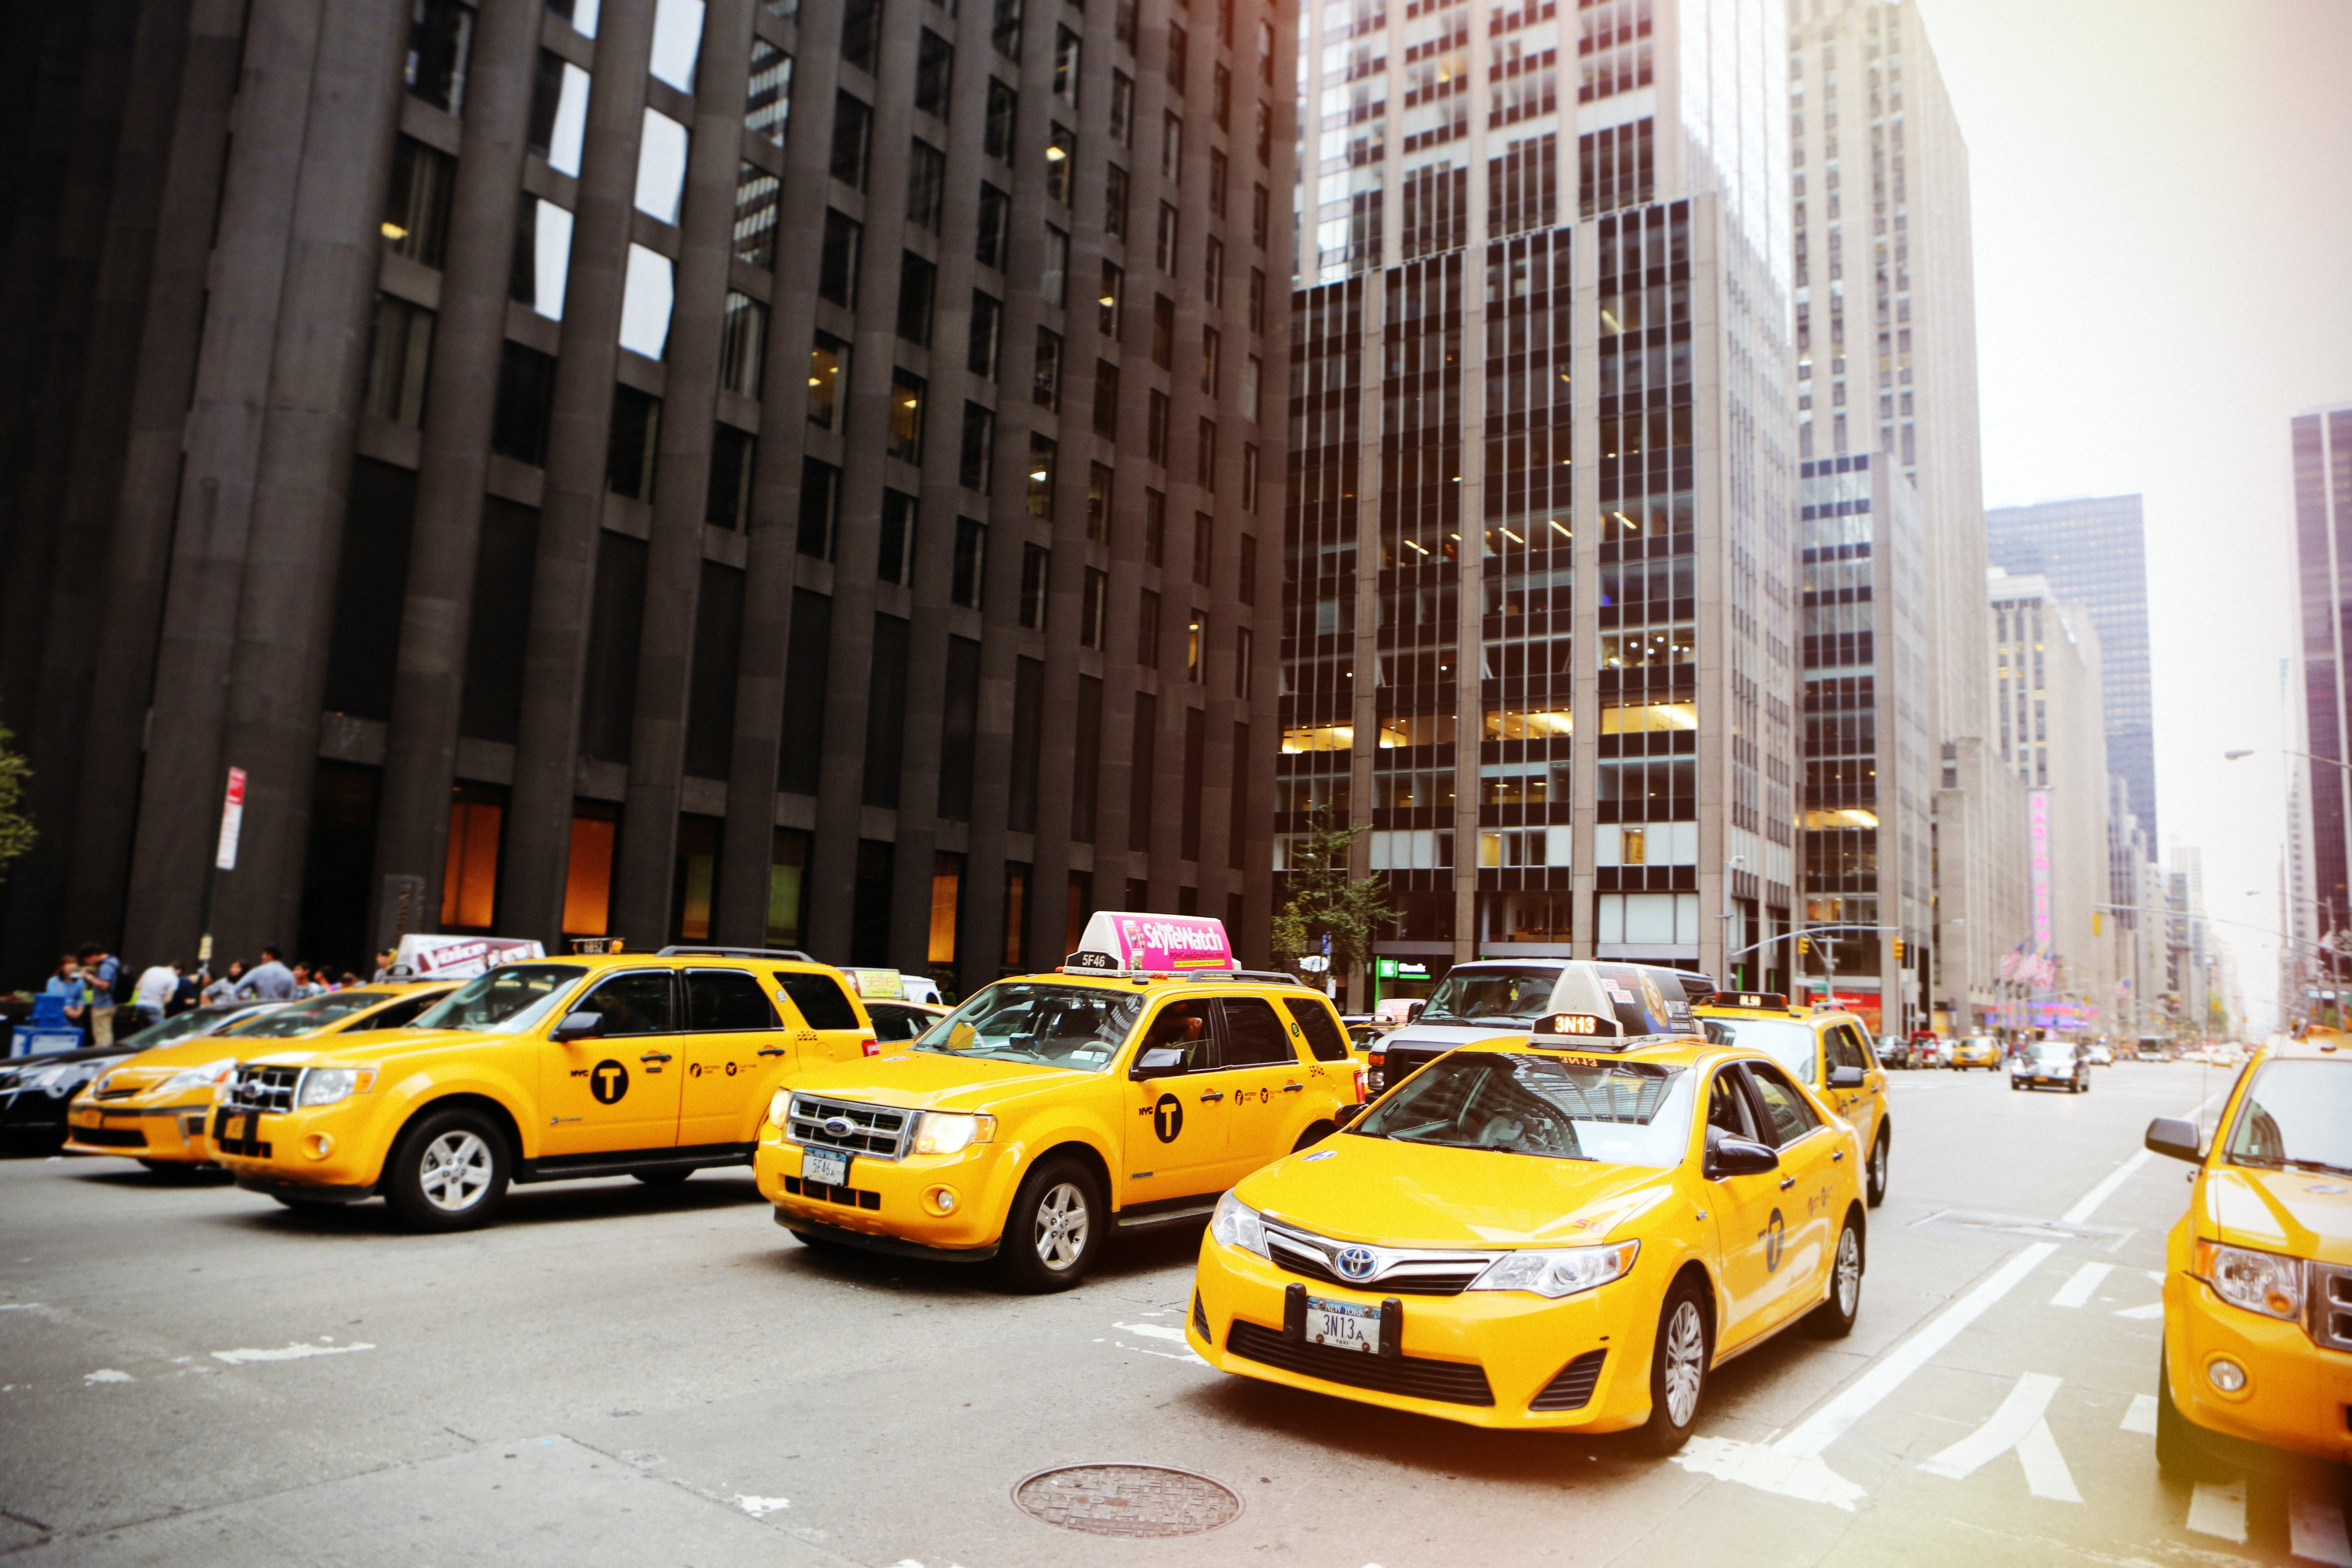

## Business Problem:


### Background:
A US-based private company called XYZ is thinking about making an investment in the cab industry. Before deciding on an investment plan, companies must have a complete understanding of the industry due to its rapid growth and a lot of significant competitors. In order to aid in the decision-making process, XYZ has collected a variety of datasets with a wide range of information on two cab companies.


### Objective:
The primary objective of this project is to use the datasets that have been made available to extract useful information that will help XYZ choose the best cab company for their investment. By highlighting important elements and trends in the cab industry, the data analysis insights will guide XYZ's go-to-market (G2M) strategy and eventually aid in decision-making.




## Project Scope:

* Data Analysis: Merge and utilise the multiple datasets provided, encompassing various aspects of customer profiles and cab company operations.

* Market Understanding: Gain insights into customer behaviour, market trends, and company performance metrics from the datasets.

* Identifying Investment Opportunity: Identify and evaluate factors that differentiate the two cab companies, highlighting strengths, weaknesses, and potential for growth.
* Actionable Recommendations: Provide actionable insights and recommendations based on the data analysis to guide XYZ in choosing the most viable cab company for investment.


## Approach:

1. Data Integration and Cleaning: Merge and clean the datasets to ensure data consistency and accuracy.


2. Exploratory Data Analysis (EDA): Explore the datasets to understand customer behaviour, market trends, and company performance metrics.


3. Framework Analysis:

  - Seasonality Analysis: 
   Explore variations in customer behavior and company performance based on seasonal trends.


   - Geographical Analysis:
   Assess the performance and demand for cab services across different cities.
   Explore regional variations in customer behaviour and cab company performance.
   
   
   - Customer Segments:
   Segment customers based on their demographics, usage patterns, and preferences.
   Understand distinct customer groups and their impact on cab companies.


   - Customer Loyalty and Retention:
    Analyse customer retention rates, factors influencing loyalty, and strategies to improve retention.
    Explore methods to enhance customer satisfaction and long-term relationships.
   
   
   - Pricing Analysis:
    Analyse pricing strategies, fare structures, and their impact on customer choices.
    Assess price sensitivity among customers and its influence on company revenue.
    
    
   - Profit Analysis:
    Evaluate the profitability of each cab company, considering costs, revenue, and operational efficiency.
    Identify opportunities for cost optimisation and revenue enhancement.
    
5. Insights and Recommendations: Generate actionable insights and recommendations based on the findings to guide XYZ in their investment decision.

## Assumptions:

* The datasets contain comprehensive and representative information about the two cab companies and their customer bases.
* The quality of the data meets a certain standard, but data cleaning and preprocessing might be necessary.
* Derived insights will provide a reasonable basis for investment decision-making, but external factors might also influence the final decision.

By structuring the project around these objectives and approaches, XYZ aims to leverage data-driven insights to make an informed investment decision in the competitive cab industry.

## 1. Data Integration and Cleaning

In this section, we outline the data integration and cleaning procedures implemented to ensure the reliability and coherence of the dataset. 

In [1]:
## Import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

sns.set_theme()

In [2]:
### Read in datasets
cab_df = pd.read_csv('Cab_Data.csv') ## cab dataset
city_df = pd.read_csv('City.csv')   ## city dataset
customers_df = pd.read_csv('Customer_ID.csv') ## customer dataset
transactions_df = pd.read_csv('Transaction_ID.csv') ## transactions dataset

### Cab dataset

The cab dataset comprises 359,392 entries, encompassing seven features that offer information on cab trips. These features include the transaction ID, travel date, cab company name, city of the trip, distance covered in kilometres, the charged price, and the trip's cost. This dataset contains no missing values.

In [3]:
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
cab_df.shape

(359392, 7)

In [5]:
cab_df.duplicated().sum()

0

All the transactions in the dataset are unique, hence there are no duplicates that need to be removed. 

In [6]:
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


The 'Date of Travel' feature is currently recorded as a string object. Before utilising it in our analysis, we'll convert its values into a date type object.

In [7]:
###c hanging dtype of 'Date of Travel' feature

# Converting  Excel serial date is in the 'Date of Travel' column
cab_df['Date of Travel'] = pd.to_datetime(cab_df['Date of Travel'], unit='D', origin='1899-12-30')

print(cab_df['Date of Travel'])

0        2016-01-08
1        2016-01-06
2        2016-01-02
3        2016-01-07
4        2016-01-03
            ...    
359387   2018-01-08
359388   2018-01-04
359389   2018-01-05
359390   2018-01-05
359391   2018-01-02
Name: Date of Travel, Length: 359392, dtype: datetime64[ns]


In [8]:
cab_df.isna().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

### City dataset

The city dataset consists of 20 entries, each containing three features that detail information about the cities where the cabs operate. These features encompass the name of the city, the city population, and the number of cab users within each specific city. This dataset contains no misssing values.

In [9]:
city_df.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [10]:
city_df.shape

(20, 3)

In [11]:
city_df.duplicated().sum()

0

In [12]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [13]:
city_df.isna().sum()

City          0
Population    0
Users         0
dtype: int64

The population and user features are currently recorded as string objects. Before utilising them in our analysis, we'll convert these values into integers. This conversion will streamline the process and enable smoother data analysis.

In [14]:
city_df['Population']=city_df['Population'].apply(lambda x: x.replace(',', '')).astype('int64')
city_df['Users']=city_df['Users'].apply(lambda x: x.replace(',', '')).astype('int64')
city_df.dtypes

City          object
Population     int64
Users          int64
dtype: object

### Customer ID  dataset

The customer ID dataset comprises 49,171 entries, containing four features that offer information about the cab companies' customers. These features encompass a unique customer ID, the customer's age, gender, and monthly income in US dollars. This dataset contains no missing values.

In [15]:
customers_df.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [16]:
customers_df.shape

(49171, 4)

In [17]:
customers_df.duplicated().sum()

0

In [18]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [19]:
customers_df.isna().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

### Transaction ID dataset

The transaction ID dataset comprises 440,098 entries, containing three features that offer information about the cab company's customers' transactions. These features encompass unique transaction IDs, customer IDs, and the customer's mode of payment. Notably, this dataset contains no missing values.

In [20]:
transactions_df.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [21]:
transactions_df.shape

(440098, 3)

In [22]:
transactions_df.duplicated().sum()

0

In [23]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [24]:
transactions_df.isna().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

### Data Merging Process

#### Step 1: Joining Transaction ID and Customer ID Datasets
* Datasets involved: transaction ID, customer ID
* Joining Criteria: Matching customer IDs
* Method used: inner join
* Outcome: Combined dataset with transaction and customer information

#### Step 2: Merging with the Cab Dataset
* Datasets involved: Combined transaction-customer dataset, Cab dataset
* Joining Criteria: Matching Transaction IDs
* Method used: inner join
* Outcome: Enriched dataset incorporating cab-related details

#### Step 3: Integration with the City Dataset
* Datasets involved: Enriched transaction-customer-cab dataset, city dataset
* Joining Criteria: Matching city names
* Method used: inner join
* Outcome: A final integrated dataset containing comprehensive information



#### Resulting Dataset Overview

* Dataset Name: Master Dataset
* Entries: 359,392
* Features: 14
  - Transaction ID
  - Customer ID
  - Date of travel
  - Customer demographic details (age, gender, income)
  - Price charged
  - Trip cost
  - Cab details (cab company name, distance travelled)
  - City-related information (city name, population, cab user count)

#### Data Quality Assurance:
* Missing Values: No missing values were found in the resulting integrated dataset.
* Data Consistency: Ensure consistency by using appropriate join criteria and methods.
* Data Integrity: Verified data integrity post-merging by cross-checking key identifiers.

The resulting dataset serves as a comprehensive repository combining information from multiple sources, enabling a holistic analysis of cab company transactions, customer demographics, and city-specific factors.


This section outlines the step-by-step process of merging datasets and summarises the characteristics of the resulting integrated dataset, highlighting key features and quality assurance measures undertaken during the merging process.




In [25]:
### Master data
master_df = transactions_df.merge(customers_df,on='Customer ID',how='inner')
master_df = master_df.merge(cab_df, on='Transaction ID',how='inner')
master_df = master_df.merge(city_df,on='City',how='inner')

In [26]:
master_df.columns

Index(['Transaction ID', 'Customer ID', 'Payment_Mode', 'Gender', 'Age',
       'Income (USD/Month)', 'Date of Travel', 'Company', 'City',
       'KM Travelled', 'Price Charged', 'Cost of Trip', 'Population', 'Users'],
      dtype='object')

In [27]:
new_column_order = ['Transaction ID', 'Customer ID', 'Date of Travel','Payment_Mode', 'Gender', 'Age',
       'Income (USD/Month)', 'Company', 'KM Travelled', 'Price Charged', 'Cost of Trip','City',
        'Population', 'Users']
master_df = master_df[new_column_order]
master_df.head()

,Transaction ID,Customer ID,Date of Travel,Payment_Mode,Gender,Age,Income (USD/Month),Company,KM Travelled,Price Charged,Cost of Trip,City,Population,Users
0,10000011,29290,2016-01-08,Card,Male,28,10813,Pink Cab,30.45,370.95,313.6350,ATLANTA GA,814885,24701
1,10351127,29290,2018-07-21,Cash,Male,28,10813,Yellow Cab,26.19,598.70,317.4228,ATLANTA GA,814885,24701
2,10412921,29290,2018-11-23,Card,Male,28,10813,Yellow Cab,42.55,792.05,597.4020,ATLANTA GA,814885,24701
3,10000012,27703,2016-01-06,Card,Male,27,9237,Pink Cab,28.62,358.52,334.8540,ATLANTA GA,814885,24701
4,10320494,27703,2018-04-21,Card,Male,27,9237,Yellow Cab,36.38,721.10,467.1192,ATLANTA GA,814885,24701


In [28]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Customer ID         359392 non-null  int64         
 2   Date of Travel      359392 non-null  datetime64[ns]
 3   Payment_Mode        359392 non-null  object        
 4   Gender              359392 non-null  object        
 5   Age                 359392 non-null  int64         
 6   Income (USD/Month)  359392 non-null  int64         
 7   Company             359392 non-null  object        
 8   KM Travelled        359392 non-null  float64       
 9   Price Charged       359392 non-null  float64       
 10  Cost of Trip        359392 non-null  float64       
 11  City                359392 non-null  object        
 12  Population          359392 non-null  int64         
 13  Users               359392 no

In [29]:
master_df.isna().sum()

Transaction ID        0
Customer ID           0
Date of Travel        0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Company               0
KM Travelled          0
Price Charged         0
Cost of Trip          0
City                  0
Population            0
Users                 0
dtype: int64

In [30]:
master_df.duplicated().sum()

0

## 2. Exploratory Data Analysis (EDA)

In this section we performed exploratory data analysis to understand customer behaviour, market trends, and company performance metrics. 


In this project, we will only fcus on transactions in the time period 31/01/2016 to 31/12/2018.

In [31]:
### Selecting data in the time period 31/01/2016 to 31/12/2018.

master_df = master_df[master_df['Date of Travel'] > '2016-01-30']
print(master_df['Date of Travel'].min())
print(master_df['Date of Travel'].max())

2016-01-31 00:00:00
2018-12-31 00:00:00


### Summary Statistics

In [32]:
num_features = master_df[['Age','Income (USD/Month)','KM Travelled','Price Charged',
                          'Cost of Trip','Population','Users']]
num_features.describe()

,Age,Income (USD/Month),KM Travelled,Price Charged,Cost of Trip,Population,Users
count,355032.000000,355032.000000,355032.000000,355032.000000,355032.000000,3.550320e+05,355032.000000
mean,35.335933,15048.244246,22.566598,422.742351,286.165041,3.137271e+06,158461.264604
std,12.593311,7968.286955,12.234181,273.830796,157.997162,3.317714e+06,100933.321233
min,18.000000,2000.000000,1.900000,15.600000,19.000000,2.489680e+05,3643.000000
25%,25.000000,8424.000000,12.000000,206.160000,151.200000,6.712380e+05,80021.000000
50%,33.000000,14682.000000,22.440000,385.870000,282.464000,1.595037e+06,144132.000000
75%,42.000000,21034.000000,32.960000,582.692500,413.683200,8.405837e+06,302149.000000
max,65.000000,35000.000000,48.000000,2048.030000,691.200000,8.405837e+06,302149.000000


#### Age Analysis: 

The ages of cab customers in this dataset are centred around the mid-30s, with a range spanning from 18 to 65 years. There is a notable spread in ages, with most customers falling between their mid-20s and early 40s, as indicated by the interquartile range.


#### Income: 

The income distribution among cab customers in this dataset ranges from 2,000 to 35,000 US dollars per month, with the average income being around 15,048.24 US dollars per month. The data shows a significant spread in income levels, with the majority of customers earning between 8,424 US dollars to 21,034 US dollars per month, as indicated by the interquartile range.


#### Distance Travelled: 

The travel distance among cab customers in this dataset ranges from approximately 1.9 to 48 kilometres, with the average travel distance being around 22.57 kilometres. The data shows a spread in travel distances, with most customers travelling between 12 and 32.96 kilometres, as indicated by the interquartile range.


#### Price Charged:

The prices charged to cab customers in this dataset range from approximately 15.60 to 2048.03 US dollars. The average price charged is around 422.74 US dollars. The data shows a spread in prices charged, with most customers being charged between 206.16 US dollars to 582.69 US dollars, as indicated by the interquartile range.


#### Cost of Trip

The costs of cab trips in this dataset range from approximately 19.00 to 691.20 US dollars. The average cost of a trip is around 286.17 US dollars. The data shows a spread in trip costs, with most trips costing between 151.20 US dollars to 413.68 US dollars, as indicated by the interquartile range.

#### Population:

The populations of cities in this dataset range from approximately 248,968 to 8,405,837. The average city population is around 3,137,271. The data shows a significant spread in city populations, with most cities having a population between 671,238 to 8,405,837, as indicated by the interquartile range.


#### Number of Users:

The number of cab users in cities in this dataset ranges from approximately 3,643 to 302,149. The average number of cab users per city is around 158,461. The data shows a spread in the number of cab users, with most cities having 80,021 to 302,149 cab users, as indicated by the interquartile range.


### Categorical features

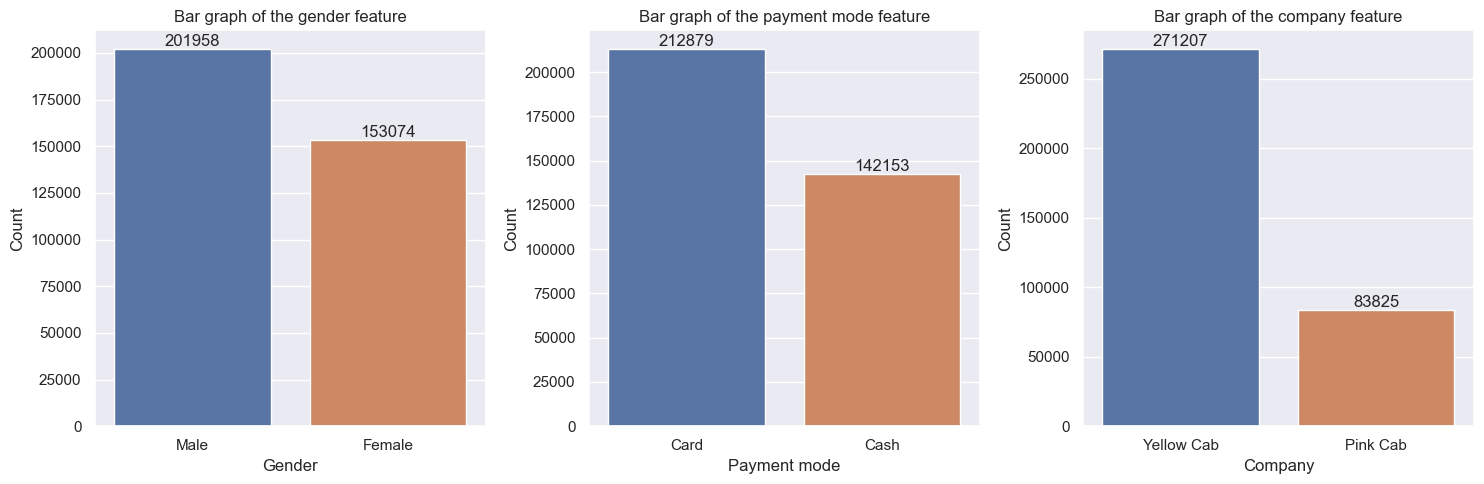

In [33]:
# Define figure and axes
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# First subplot - Gender feature
categories_gender = ['Male', 'Female']
values_gender = master_df['Gender'].value_counts()

sns.barplot(x=categories_gender, y=values_gender, ax=axs[0])
for i, v in enumerate(values_gender):
    axs[0].text(i, v + 10, str(v), ha='center', va='bottom')
axs[0].set_xlabel('Gender')
axs[0].set_ylabel('Count')
axs[0].set_title('Bar graph of the gender feature')

# Second subplot - Payment mode feature
categories_payment = ['Card', 'Cash']
values_payment = master_df['Payment_Mode'].value_counts()

sns.barplot(x=categories_payment, y=values_payment, ax=axs[1])
for i, v in enumerate(values_payment):
    axs[1].text(i, v + 10, str(v), ha='center', va='bottom')
axs[1].set_xlabel('Payment mode')
axs[1].set_ylabel('Count')
axs[1].set_title('Bar graph of the payment mode feature')

# Third subplot - Company feature
categories_company = ['Yellow Cab', 'Pink Cab']
values_company = master_df['Company'].value_counts()

sns.barplot(x=categories_company, y=values_company, ax=axs[2])
for i, v in enumerate(values_company):
    axs[2].text(i, v + 10, str(v), ha='center', va='bottom')
axs[2].set_xlabel('Company')
axs[2].set_ylabel('Count')
axs[2].set_title('Bar graph of the company feature')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [34]:
a = master_df.Payment_Mode.value_counts().sum()

In [35]:
 master_df.Payment_Mode.value_counts()/a

Card    0.599605
Cash    0.400395
Name: Payment_Mode, dtype: float64

#### Summary

The trio of bar graphs above illustrates several key insights:

* Gender Distribution: The data predominantly consists of male customers (57%), compared to female customers (43%).
 
* Payment Preferences: The majority of customers opt for card payments (60%) over cash transactions (40%).
 
* Cab Company Preference: The data indicates a notable preference for the Yellow Cab (76%) over the Pink Cab (24%) among customers.

These findings provide a clear snapshot of customer behaviour and preferences within the dataset, highlighting significant trends in gender representation, payment modes, and cab company usage.


## Framework Analysis

We will look at 6 frameworks in order to decide on thr best cab company for XYZ to invest in.

### 1. Seasonality Analysis

Is there any seasonality in the number of customers using the cab service?

Areas to investigate:
* Which company experiences the highest cab usage during specific time periods?



#### Quarterly Analysis

In [36]:
#### Cab usage per quarter

df = master_df.copy()

# Create a new column 'Quarter'
df['Quarter'] = df['Date of Travel'].dt.quarter

# Mapping quarters to Q1, Q2, Q3, Q4
quarter_map = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}

# Create a new column 'Quarter_Label'
df['Quarter_Label'] = df['Quarter'].map(quarter_map)

## Create year feature
df['Year'] = df['Date of Travel'].dt.year
quarterly = df.groupby(['Year','Quarter_Label','Company']).agg({
    'Transaction ID':'count'    
}).reset_index()

quarterly.columns = ['Year','Quarter_Label','Company','Total Trips']
quarterly.head()

,Year,Quarter_Label,Company,Total Trips
0,2016,Q1,Pink Cab,2322
1,2016,Q1,Yellow Cab,10065
2,2016,Q2,Pink Cab,4537
3,2016,Q2,Yellow Cab,16994
4,2016,Q3,Pink Cab,7251


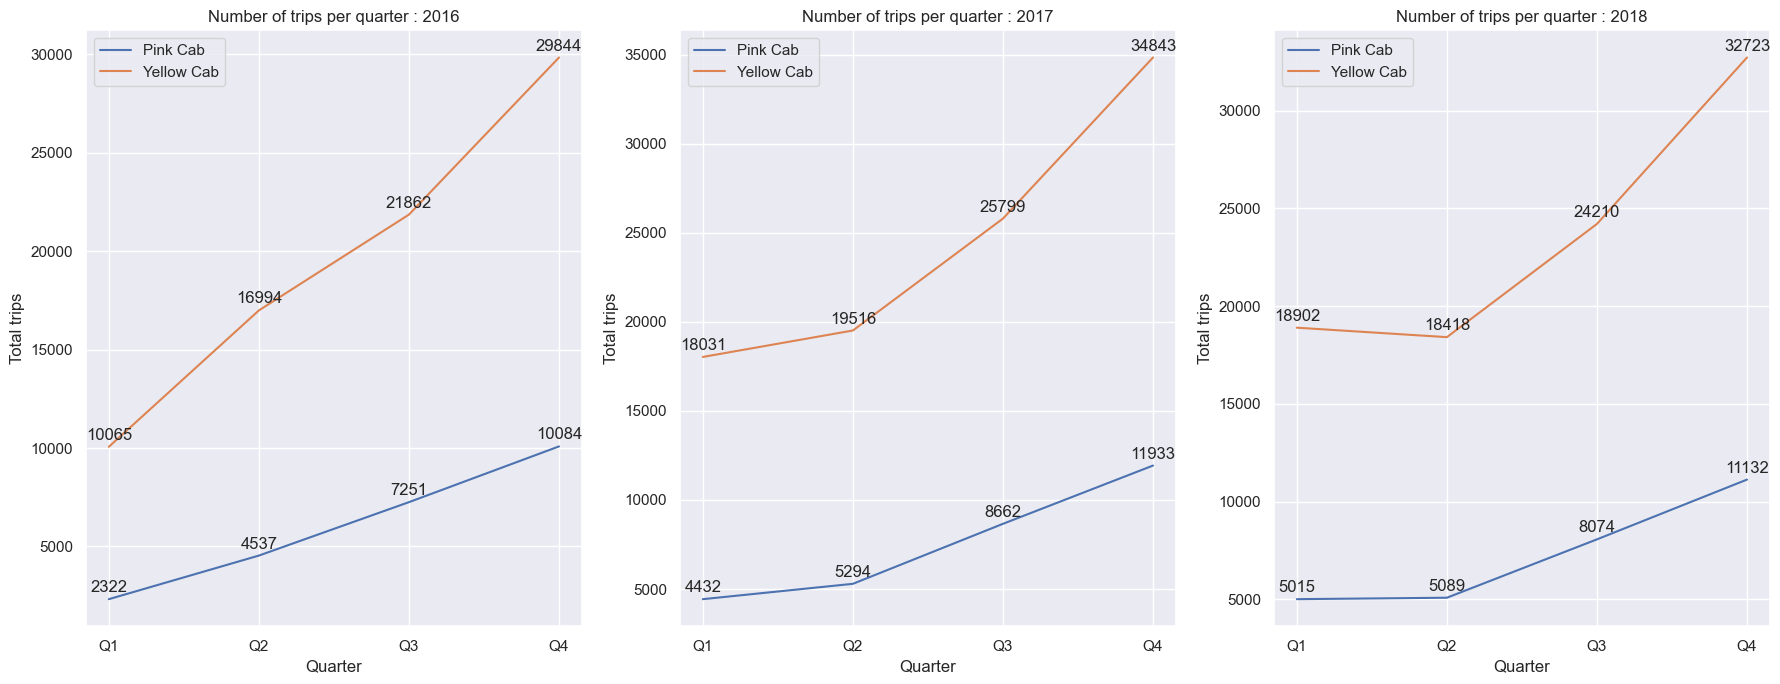

In [37]:
### Break data into years

year_2016 = quarterly[quarterly['Year']==2016]
year_2017 = quarterly[quarterly['Year']==2017]
year_2018 = quarterly[quarterly['Year']==2018]


year_2016.set_index('Quarter_Label',inplace=True)
year_2017.set_index('Quarter_Label',inplace=True)
year_2018.set_index('Quarter_Label',inplace=True)



### Break data by Company 

pink_2016 = year_2016[year_2016['Company']=='Pink Cab']
yellow_2016 = year_2016[year_2016['Company']=='Yellow Cab']

pink_2017 = year_2017[year_2017['Company']=='Pink Cab']
yellow_2017 = year_2017[year_2017['Company']=='Yellow Cab']


pink_2018 = year_2018[year_2018['Company']=='Pink Cab']
yellow_2018 = year_2018[year_2018['Company']=='Yellow Cab']




fig, axes = plt.subplots(1, 3, figsize=(18, 7))

# Plotting the first graph
axes[0].plot(pink_2016.index, pink_2016['Total Trips'], label='Pink Cab')
axes[0].plot(yellow_2016.index, yellow_2016['Total Trips'], label='Yellow Cab')
axes[0].set_title('Number of trips per quarter : 2016')
axes[0].set_xlabel('Quarter')
axes[0].set_ylabel('Total trips')
axes[0].legend()
axes[0].grid(True)

for x, y in zip(pink_2016.index, pink_2016['Total Trips']):
    axes[0].annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0, 5), ha='center')

for x, y in zip(yellow_2016.index, yellow_2016['Total Trips']):
    axes[0].annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0, 5), ha='center')


    
# Plotting the second graph
axes[1].plot(pink_2017.index, pink_2017['Total Trips'], label='Pink Cab')
axes[1].plot(yellow_2017.index, yellow_2017['Total Trips'], label='Yellow Cab')
axes[1].set_title('Number of trips per quarter : 2017')
axes[1].set_xlabel('Quarter')
axes[1].set_ylabel('Total trips')
axes[1].legend()
axes[1].grid(True)


for x, y in zip(pink_2017.index, pink_2017['Total Trips']):
    axes[1].annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0, 5), ha='center')

for x, y in zip(yellow_2017.index, yellow_2017['Total Trips']):
    axes[1].annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0, 5), ha='center')
    
    
# Plotting the third graph
axes[2].plot(pink_2018.index, pink_2018['Total Trips'], label='Pink Cab')
axes[2].plot(yellow_2018.index, yellow_2018['Total Trips'], label='Yellow Cab')
axes[2].set_title('Number of trips per quarter : 2018')
axes[2].set_xlabel('Quarter')
axes[2].set_ylabel('Total trips')
axes[2].legend()
axes[2].grid(True)   
    

for x, y in zip(pink_2018.index, pink_2018['Total Trips']):
    axes[2].annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0, 5), ha='center')

for x, y in zip(yellow_2018.index, yellow_2018['Total Trips']):
    axes[2].annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0, 5), ha='center')


plt.tight_layout()
plt.show()


#### Monthly
 


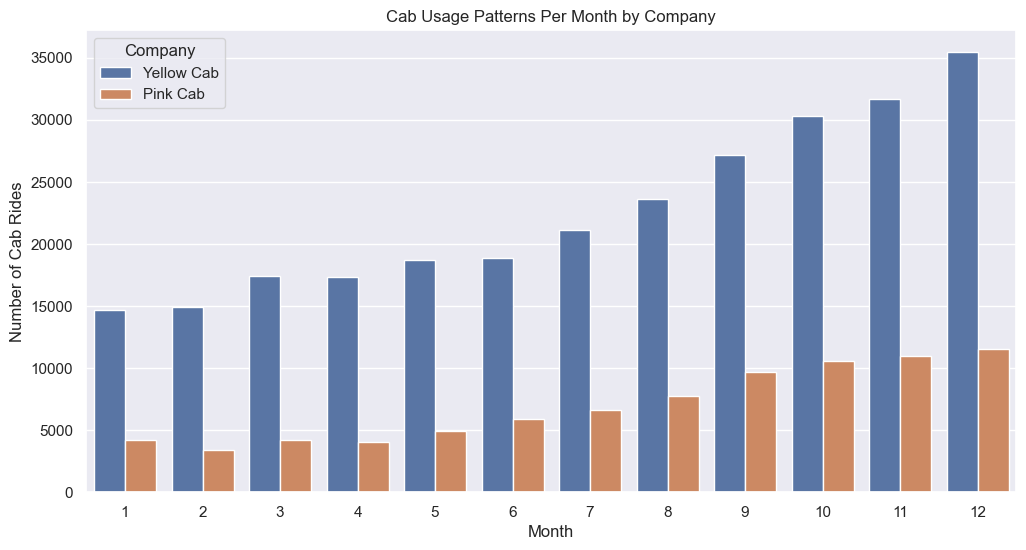

In [38]:
### Monthly and Weekly Usage

cab_data = master_df.loc[:,['Date of Travel','Company','Users']]
# Extract relevant time-related features
cab_data['month'] = cab_data['Date of Travel'].dt.month
cab_data['Day_of_Week'] = cab_data['Date of Travel'].dt.day_name()

# Plot usage patterns during the day for each cab company
plt.figure(figsize=(12, 6))
sns.countplot(x='month', hue='Company', data=cab_data)
plt.title('Cab Usage Patterns Per Month by Company')
plt.xlabel('Month')
plt.ylabel('Number of Cab Rides')
plt.legend(title='Company')
plt.show()



#### Weekly Analysis


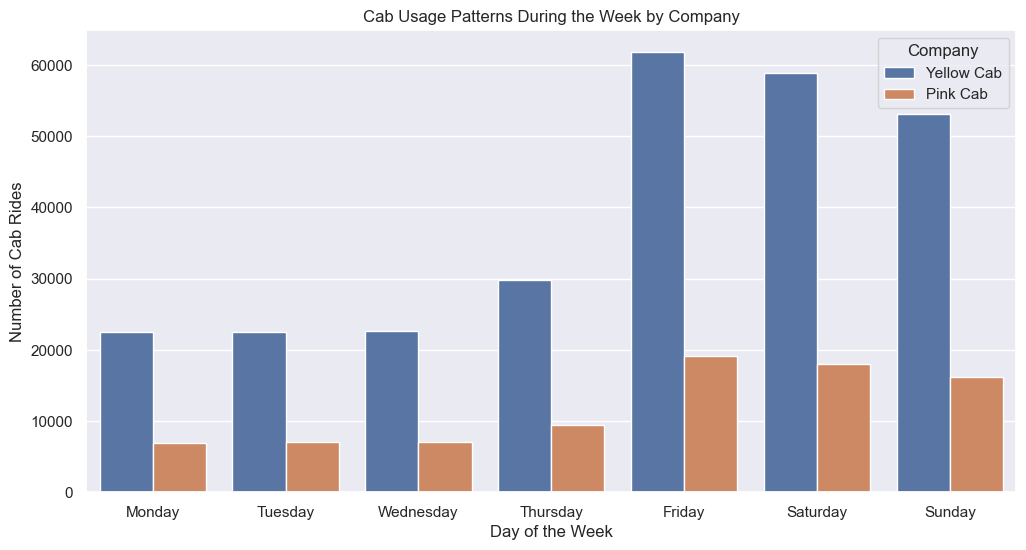

In [39]:
# Plot usage patterns during the week for each cab company
plt.figure(figsize=(12, 6))
sns.countplot(x='Day_of_Week', hue='Company', data=cab_data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Cab Usage Patterns During the Week by Company')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Cab Rides')
plt.legend(title='Company')
plt.show()

### Conclusion

* Consistent Yellow Cab Usage: The Yellow Cab Company consistently experiences the highest usage over all four quarters of the year and across all 12 months.
Both cab companies, Yellow Cab and Pink Cab, observed increased usage between quarters 3 and 4, coinciding with the holiday season.


* Peak Usage Periods: The highest usage for both companies occurs in the months of October, November, and December, especially during the fourth quarter, aligning with heightened travel activity during the holiday season.


* Weekend Usage Trends: Both companies experience higher usage over the weekend, particularly on Fridays, with Yellow Cab exhibiting higher usage overall compared to Pink Cab throughout the week.


Considering these observations, there seems to be clear evidence of seasonality in cab usage, particularly during the holiday season and weekends. Both Yellow Cab and Pink Cab experience increased usage during specific time periods, notably in the fourth quarter and over the weekends. Additionally, Yellow Cab consistently holds the highest usage rate across various time frames

## 2. Geographical Analysis:


How does cab usage vary across different cities or regions?
 
Areas to investigate:

* What are the geographical hotspots for each cab company in terms of customer usage?

* Do specific geographical factors influence customer preferences or usage patterns?

In [40]:
city_stats = master_df.groupby('City').agg({
    'Users': 'count',
    'Population': 'mean',
    'Income (USD/Month)': 'mean'
}).reset_index()

city_stats.columns = ['City','Number of users','Population','Average Income']
city_stats.head()

,City,Number of users,Population,Average Income
0,ATLANTA GA,7456,814885.0,14945.171406
1,AUSTIN TX,4867,698371.0,14688.837888
2,BOSTON MA,29310,248968.0,15113.652371
3,CHICAGO IL,55773,1955130.0,15104.129113
4,DALLAS TX,6911,942908.0,14844.066126


In [41]:
city_stats['City User Prop'] = city_stats['Number of users']/city_stats['Population']
city_stats

,City,Number of users,Population,Average Income,City User Prop
0,ATLANTA GA,7456,814885.0,14945.171406,0.009150
1,AUSTIN TX,4867,698371.0,14688.837888,0.006969
2,BOSTON MA,29310,248968.0,15113.652371,0.117726
3,CHICAGO IL,55773,1955130.0,15104.129113,0.028526
4,DALLAS TX,6911,942908.0,14844.066126,0.007329
5,DENVER CO,3780,754233.0,14965.264815,0.005012
6,LOS ANGELES CA,47453,1595037.0,15064.927655,0.029750
7,MIAMI FL,6418,1339155.0,14997.046432,0.004793
8,NASHVILLE TN,2989,327225.0,14719.222148,0.009134
9,NEW YORK NY,98925,8405837.0,15181.396138,0.011769


In [42]:
highest_city = city_stats.sort_values('Number of users', ascending=False)
highest_city.head()

,City,Number of users,Population,Average Income,City User Prop
9,NEW YORK NY,98925,8405837.0,15181.396138,0.011769
3,CHICAGO IL,55773,1955130.0,15104.129113,0.028526
6,LOS ANGELES CA,47453,1595037.0,15064.927655,0.029750
18,WASHINGTON DC,43101,418859.0,14727.465326,0.102901
2,BOSTON MA,29310,248968.0,15113.652371,0.117726


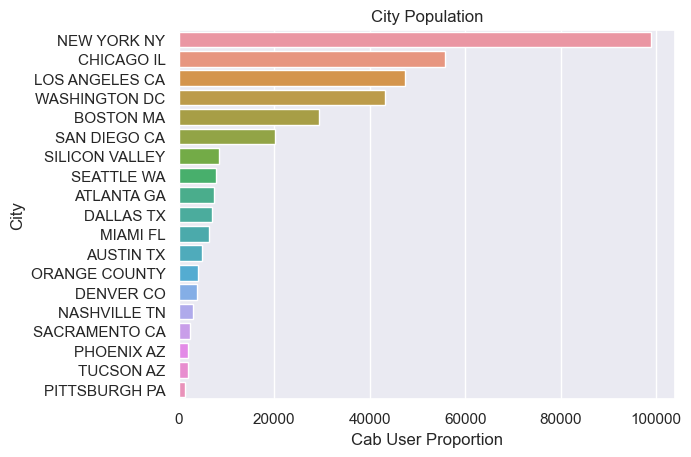

In [43]:
sns.barplot(x='Number of users',y='City', data=highest_city)
plt.xlabel('Cab User Proportion')
plt.title('City Population')
plt.show()

* The two companies operate across 20 cities in the dataset.
* New York, Chicago and Los Angeles have the highest cab usage across all 20 cities the cabs operate in.
* Tucson and Pittsburgh have the lowest cab usage across all 20 cities.

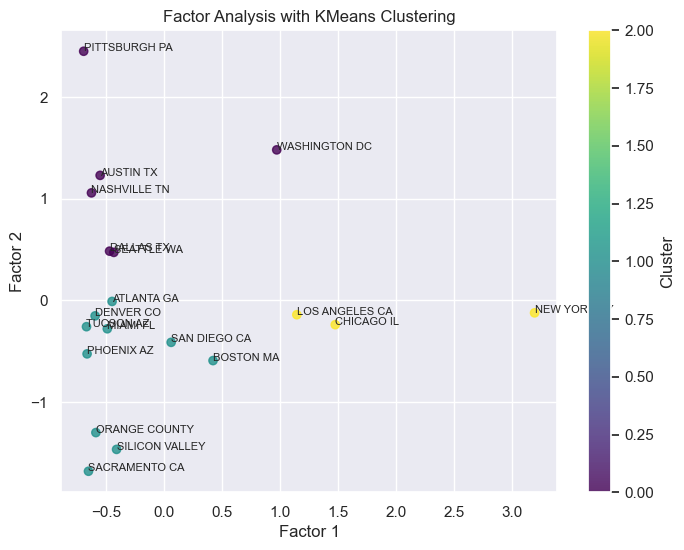

In [44]:
### Clustering cities with similar properties

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis

# Select features for PCA
features = ['Number of users','City User Prop','Average Income']  

# Prepare data
X = city_stats[features]

# Standardize the data 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and fit Factor Analysis
n_factors = 2  # Choose the number of factors
fa = FactorAnalysis(n_components=n_factors)
X_fa = fa.fit_transform(X)

# Initialize and fit KMeans on Factor Analysis results
n_clusters = 3  # Choose the number of clusters
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X_fa)

# Get cluster labels
cluster_labels = kmeans.labels_

# Visualize Factor Analysis with clustering
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_fa[:, 0], X_fa[:, 1], c=cluster_labels, cmap='viridis', alpha=0.8)
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.title('Factor Analysis with KMeans Clustering')

# Annotate points with city names
for i, city in enumerate(city_stats['City']):
    plt.text(X_fa[i, 0], X_fa[i, 1], city, fontsize=8)

plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

* The first cluster (depicted by blue dots) comprises cities with the largest population and notably high average incomes.

* The second cluster (represented by purple) encompasses cities with relatively high average incomes, yet smaller population sizes compared to the first Cluster.

* Lastly, the third cluster (illustrated in yellow) pertains to cities with smaller populations and fewer cab users. luster (illustrated in yellow) pertains to cities with smaller populations and fewer cab users. These cities typically have lower average incomes.


###  Conclusion

#### How does cab usage vary across different cities or regions?

Cab usage varies significantly across the 20 cities where the cab services operate. New York, Chicago, and Los Angeles emerge as the prominent hotspots for cab usage, exhibiting notably high demand across all regions. Conversely, Tucson and Pittsburgh register the lowest cab usage among these cities, indicating comparatively lower demand for cab services in these regions.


#### What are the geographical hotspots for each cab company in terms of customer usage?

In terms of customer usage, the geographical hotspots for cab companies coincide with the cities exhibiting the highest cab usage. New York, Chicago, and Los Angeles stand out as the primary geographical hotspots for both cab companies, indicating a consistent pattern where the cities with the highest overall cab usage also serve as key areas for both companies' customer activities.



#### Do specific geographical factors influence customer preferences or usage patterns?

Geographical factors appear to influence customer preferences and usage patterns across the different clusters identified. The first cluster, characterised by cities with larger populations and higher average incomes, demonstrates a strong demand for cab services. In contrast, the second cluster, with cities showcasing relatively high average incomes but smaller populations, exhibits a different usage pattern. Lastly, the third cluster, comprised of cities with smaller populations and fewer cab users, coincides with lower average incomes, suggesting a potential link between population size, income levels, and cab usage preferences in different geographical regions.

In [45]:
### Breakdown by company

city_data = master_df.groupby(['Company','City']).agg({
    'Users': 'count',
    'Population': 'mean',
    'Price Charged': 'mean'
}).reset_index()

city_data.columns = ['Company','City','Number of users','Population','Average Price Charged']
city_data.head()

,Company,City,Number of users,Population,Average Price Charged
0,Pink Cab,ATLANTA GA,1741,814885.0,301.969879
1,Pink Cab,AUSTIN TX,1861,698371.0,320.524352
2,Pink Cab,BOSTON MA,5115,248968.0,300.964733
3,Pink Cab,CHICAGO IL,9248,1955130.0,280.963950
4,Pink Cab,DALLAS TX,1356,942908.0,261.404926


In [46]:
pink_city_data = city_data[city_data['Company']=='Pink Cab']
yellow_city_data = city_data[city_data['Company']=='Yellow Cab']
yellow_city_data.index = [i for i in range(0,19)]

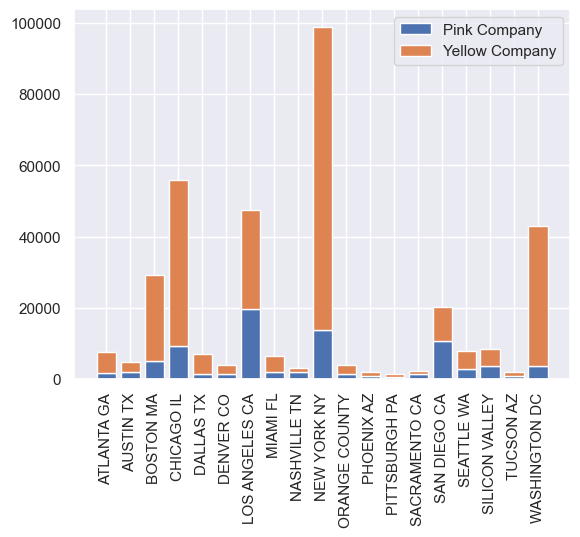

In [47]:

# Create a figure and axis
fig, ax = plt.subplots()

# Create the first set of bars
ax.bar(x=pink_city_data['City'], height=pink_city_data['Number of users'], label='Pink Company')

# Create the second set of bars, stacked on top of the first
ax.bar(x=yellow_city_data['City'], height=yellow_city_data['Number of users'], bottom=pink_city_data['Number of users'], label='Yellow Company')

# Rotate the x-axis tick labels
ax.tick_params(axis='x', rotation=90)

# Display the legend
ax.legend()

# Show the plot
plt.show()


* The Yellow Cab has the highest usages across all 20 countries.
* The Yellow Cab company usage hotspots are New York, Chicago and Los Angeles.
* The Pink Cab company usage hotspots are Los Angeles, New York and Chicago.

### 3. Customer Segments:
What are the distinct customer groups based on demographics or behaviour?
 
Areas to investigate:

* Are there distinct customer segments based on demographic data, and how do these segments relate to the choice of cab company?
* How do different customer segments contribute to revenue or company growth?


In [48]:
master_df.describe()['Income (USD/Month)']

count    355032.000000
mean      15048.244246
std        7968.286955
min        2000.000000
25%        8424.000000
50%       14682.000000
75%       21034.000000
max       35000.000000
Name: Income (USD/Month), dtype: float64

In [49]:
df = master_df.copy()
df['Year'] = df['Date of Travel'].dt.year

young_threshold = 29 
old_threshold = 49

# Categorize the ages
df['Age_bin'] = pd.cut(df['Age'], bins=[0, young_threshold, old_threshold, float('inf')],
labels=['18-29', '30-49', '50-65'])


low_threshold = 8000
high_threshold = 15000

df['Income_bin'] = pd.cut(df['Income (USD/Month)'], bins=[0, low_threshold, high_threshold, float('inf')],
labels=['Low Income', 'Medium Income', 'High Income'])

customers = df.groupby(['Year','Company']).agg({
    'Customer ID': 'count',
    'Age_bin': [lambda x: x.eq('18-29').sum(), lambda x: x.eq('30-49').sum(),lambda x: x.eq('50-65').sum()],
    'Gender': [lambda x: x.eq('Male').sum(), lambda x: x.eq('Female').sum()],
    'Income_bin': [lambda x: x.eq('Low Income').sum(), lambda x: x.eq('Medium Income').sum(),lambda x: x.eq('High Income').sum()]
}).reset_index()

customers.columns = ['Year','Company','Number of users','Ages: 18-29',
                     'Ages: 30-49','Ages: 50-65','Number of Males','Number of Females',
                     'Low Income','Medium Income','High Income']

customers.head()


,Year,Company,Number of users,Ages: 18-29,Ages: 30-49,Ages: 50-65,Number of Males,Number of Females,Low Income,Medium Income,High Income
0,2016,Pink Cab,24194,9362,10625,4207,13361,10833,5634,6596,11964
1,2016,Yellow Cab,78765,30265,35212,13288,45270,33495,18374,22017,38374
2,2017,Pink Cab,30321,11922,13281,5118,16846,13475,7114,8369,14838
3,2017,Yellow Cab,98189,38003,43622,16564,56404,41785,22672,27526,47991
4,2018,Pink Cab,29310,11340,13046,4924,16178,13132,6926,8167,14217


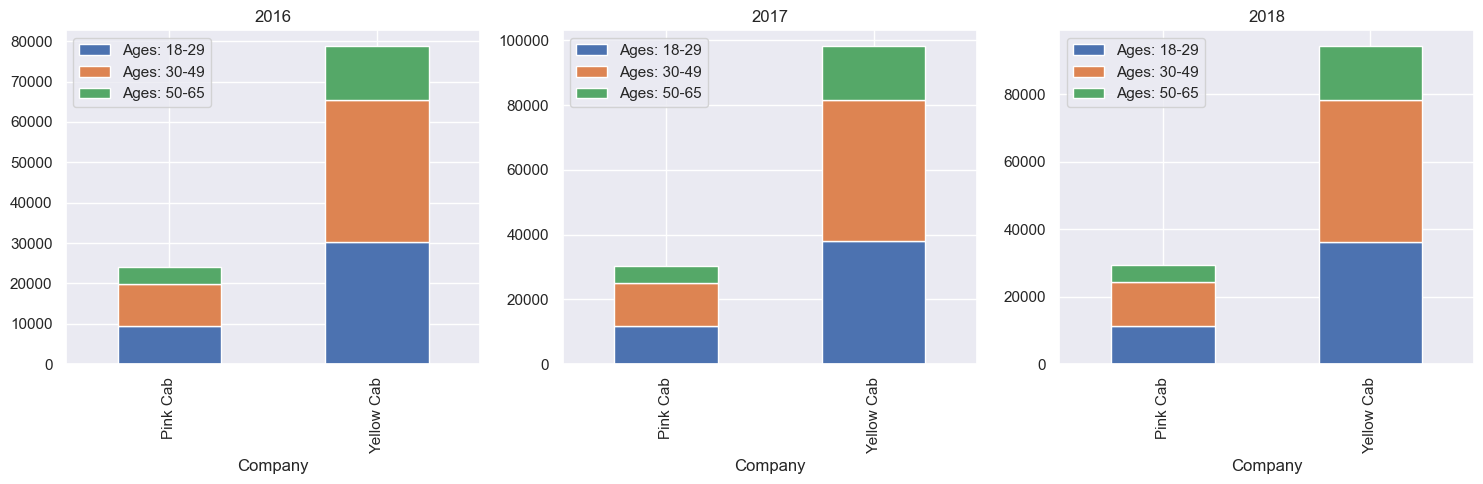

In [50]:
customers_2016 = customers[customers['Year']==2016]
customers_2017 = customers[customers['Year']==2017]
customers_2018 = customers[customers['Year']==2018]


fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot for 2016
customers_2016[['Company', 'Ages: 18-29', 'Ages: 30-49', 'Ages: 50-65']].plot('Company', kind='bar', stacked=True, ax=axs[0])
axs[0].set_title('2016')

# Plot for 2017
customers_2017[['Company', 'Ages: 18-29', 'Ages: 30-49', 'Ages: 50-65']].plot('Company', kind='bar', stacked=True, ax=axs[1])
axs[1].set_title('2017')

# Plot for 2018
customers_2018[['Company', 'Ages: 18-29', 'Ages: 30-49', 'Ages: 50-65']].plot('Company', kind='bar', stacked=True, ax=axs[2])
axs[2].set_title('2018')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


* The predominant age group among the customers of both companies comprises individuals aged 30 to 49, followed by those younger than 30. The smallest demographic consists of customers aged over 50. This age distribution suggests a strong appeal to the middle-aged and younger generations.

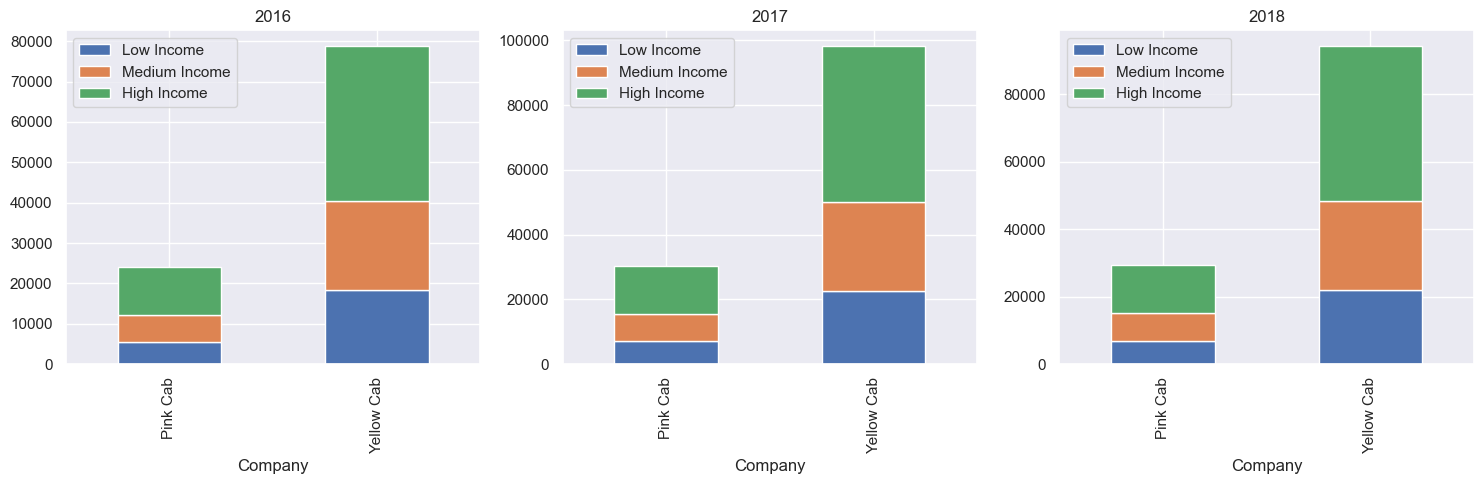

In [51]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot for 2016
customers_2016[['Company', 'Low Income', 'Medium Income', 'High Income']].plot('Company', kind='bar', stacked=True, ax=axs[0])
axs[0].set_title('2016')

# Plot for 2017
customers_2017[['Company', 'Low Income', 'Medium Income', 'High Income']].plot('Company', kind='bar', stacked=True, ax=axs[1])
axs[1].set_title('2017')

# Plot for 2018
customers_2018[['Company', 'Low Income', 'Medium Income', 'High Income']].plot('Company', kind='bar', stacked=True, ax=axs[2])
axs[2].set_title('2018')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


* Majority of the cab customers are high income and middlle income customers. This is consistent across both cab companies over all three years.

In [52]:
### Effect of customer segments on revenue


age_revenue = df.groupby(['Year','Age_bin','Company']).agg({
    'Price Charged': 'sum'
}).reset_index()

age_revenue.columns= ['Year','Age_bin','Company','Revenue']

age_revenue.head()

,Year,Age_bin,Company,Revenue
0,2016,18-29,Pink Cab,2954486.19
1,2016,18-29,Yellow Cab,14106263.94
2,2016,30-49,Pink Cab,3330624.61
3,2016,30-49,Yellow Cab,16417924.04
4,2016,50-65,Pink Cab,1333109.87


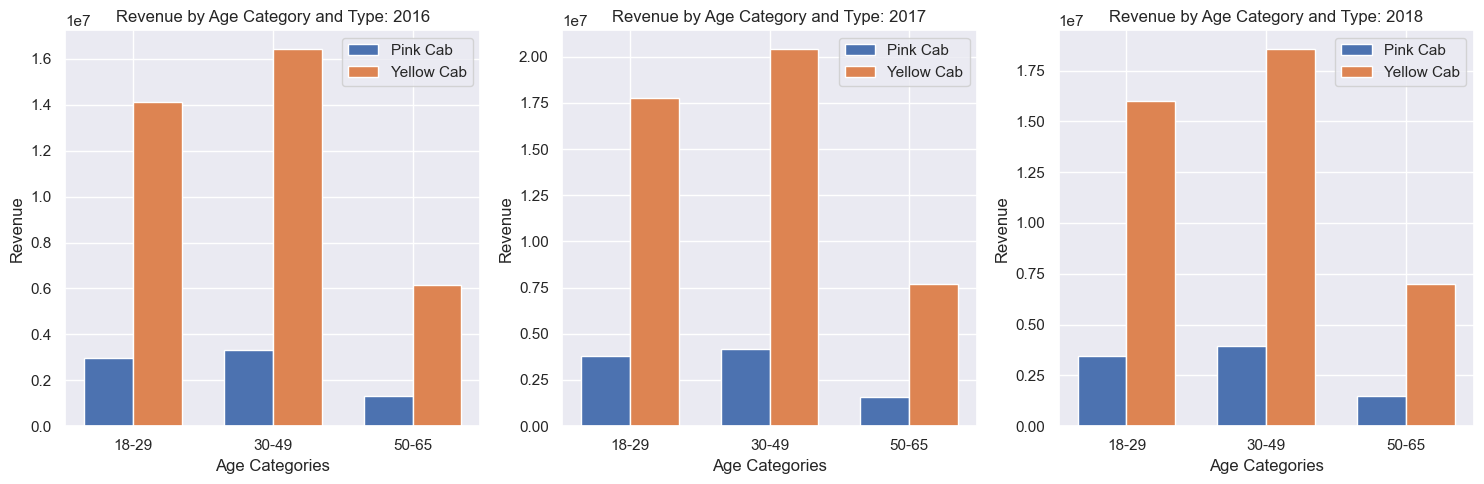

In [53]:
ageRev_2016 = age_revenue[age_revenue['Year']==2016]
ageRev_2017 = age_revenue[age_revenue['Year']==2017]
ageRev_2018 = age_revenue[age_revenue['Year']==2018]


pinkRev16 = ageRev_2016[ageRev_2016['Company'] == 'Pink Cab']
pinkRev17 = ageRev_2017[ageRev_2017['Company'] == 'Pink Cab']
pinkRev18 = ageRev_2018[ageRev_2018['Company'] == 'Pink Cab']

yellowRev16 = ageRev_2016[ageRev_2016['Company'] == 'Yellow Cab']
yellowRev17 = ageRev_2017[ageRev_2017['Company'] == 'Yellow Cab']
yellowRev18 = ageRev_2018[ageRev_2018['Company'] == 'Yellow Cab']

age_categories = ['18-29', '30-49','50-65']

# Setting the positions for the bars
bar_width = 0.35
index = range(len(yellowRev16))

fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # Create subplots with 1 row and 3 columns

# Plot for 2016
axs[0].bar(index, pinkRev16['Revenue'], bar_width, label='Pink Cab')
axs[0].bar([i + bar_width for i in index], yellowRev16['Revenue'], bar_width, label='Yellow Cab')
axs[0].set_xlabel('Age Categories')
axs[0].set_ylabel('Revenue')
axs[0].set_title('Revenue by Age Category and Type: 2016')
axs[0].set_xticks([i + bar_width / 2 for i in index])
axs[0].set_xticklabels(age_categories)
axs[0].legend()

# Plot for 2017
axs[1].bar(index, pinkRev17['Revenue'], bar_width, label='Pink Cab')
axs[1].bar([i + bar_width for i in index], yellowRev17['Revenue'], bar_width, label='Yellow Cab')
axs[1].set_xlabel('Age Categories')
axs[1].set_ylabel('Revenue')
axs[1].set_title('Revenue by Age Category and Type: 2017')
axs[1].set_xticks([i + bar_width / 2 for i in index])
axs[1].set_xticklabels(age_categories)
axs[1].legend()

# Plot for 2018
axs[2].bar(index, pinkRev18['Revenue'], bar_width, label='Pink Cab')
axs[2].bar([i + bar_width for i in index], yellowRev18['Revenue'], bar_width, label='Yellow Cab')
axs[2].set_xlabel('Age Categories')
axs[2].set_ylabel('Revenue')
axs[2].set_title('Revenue by Age Category and Type: 2018')
axs[2].set_xticks([i + bar_width / 2 for i in index])
axs[2].set_xticklabels(age_categories)
axs[2].legend()

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


* The plots above show that middle-aged customers (30–49) contribute to the cab companies' revenues annually. The above-50 category contributes the least to the revenue.


### Conclusion


The distinct customer groups based on demographics and behaviour reveal several significant patterns:

Are there distinct customer segments based on demographic data, and how do these segments relate to the choice of cab company?
The demographic analysis unveils clear segmentation among customers. The prevalent age group for both cab companies centers around individuals aged 30 to 49, closely followed by those younger than 30. Contrarily, customers aged over 50 constitute the smallest demographic. This distribution suggests a strong affinity toward the middle-aged and younger generations. Additionally, the majority of cab customers fall within high- and middle-income brackets, a consistent trend observed across both cab companies over the past three years.

How do different customer segments contribute to revenue or company growth?
An examination of revenue contributions by age categories affirms the pivotal role played by middle-aged customers (30–49) in bolstering the annual revenue for the cab companies. Conversely, the demographic aged above 50 contributes the least to the overall revenue. These observations underscore the significance of targeting middle-aged and younger demographic segments for sustained revenue growth and company expansion strategies.

## 4. Customer Loyalty and Retention: 

What is the customer loyalty and retention for each company?

Areas to investigate:

Are there specific customer segments that are more loyal to one cab company over the other?

Are there indications of potential churn among specific customer segments?

#### Calculating RFM Metrics:

We will calculate Recency, Frequency, and Monetary metrics for each customer.

* Recency (R): How recently a customer made a transaction (the number of days since the last cab ride).

* Frequency (F): How often a customer uses a cab (the total number of cab rides).

* Monetary Value (M): How much money a customer spends on cabs (the total spending).

In [54]:
reference_date = datetime.strptime('2019-01-01', '%Y-%m-%d')

# Calculate Recency, Frequency, and Monetary metrics
rfm_data = master_df.groupby(['Customer ID','Company']).agg({
    'Date of Travel': lambda x: (reference_date - pd.to_datetime(x.max())).days,  # Recency
    'Transaction ID': 'count',  # Frequency
    'Price Charged': 'sum'  # Monetary Value
}).reset_index()

rfm_data.columns = ['Customer ID','Company' ,'Recency', 'Frequency', 'Monetary']

In [55]:
rfm_data.head()

,Customer ID,Company,Recency,Frequency,Monetary
0,1,Pink Cab,387,4,2286.48
1,1,Yellow Cab,16,25,15203.65
2,2,Pink Cab,298,4,1594.71
3,2,Yellow Cab,16,36,22398.15
4,3,Pink Cab,35,6,2854.62


### Segmenting Customers:

We will divide customers into segments based on quantiles or predefined thresholds for Recency, Frequency, and Monetary metrics.

In [56]:
# Define quantiles or thresholds for segmentation
recency_thresholds = [0, 90, 180, 365,float('inf')]
frequency_thresholds = [0, 15,30,float('inf')]
monetary_thresholds = [0,1000,5000,10000,30000,float('inf')]

# Create segments based on quantiles or thresholds
rfm_data['R_Segment'] = pd.cut(rfm_data['Recency'], bins=recency_thresholds, labels=False)
rfm_data['F_Segment'] = pd.cut(rfm_data['Frequency'], bins=frequency_thresholds, labels=False)
rfm_data['M_Segment'] = pd.cut(rfm_data['Monetary'], bins=monetary_thresholds, labels=False)


In [57]:
rfm_data['RFM_Segment'] = rfm_data['R_Segment'].astype(str) + rfm_data['F_Segment'].astype(str) + rfm_data['M_Segment'].astype(str)

In [58]:
rfm_data.head()

,Customer ID,Company,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Segment
0,1,Pink Cab,387,4,2286.48,3,0,1,301
1,1,Yellow Cab,16,25,15203.65,0,1,3,013
2,2,Pink Cab,298,4,1594.71,2,0,1,201
3,2,Yellow Cab,16,36,22398.15,0,2,3,023
4,3,Pink Cab,35,6,2854.62,0,0,1,001


In [59]:
# Merge RFM data with customer data
merged_data = pd.merge(customers_df, rfm_data, on='Customer ID', how='inner')

# Compare loyalty for each cab company
loyalty_comparison = merged_data.groupby(['RFM_Segment', 'Company']).size().unstack(fill_value=0)
loyalty_comparison.head()

Company,Pink Cab,Yellow Cab
RFM_Segment,,
000,4498,3095
001,4511,7256
002,9,1392
003,0,2
011,2,109


### RFM Results Analysis

* The predominant customer group across both cab companies lies within segment 300 (R = 3, F = 0, and M = 0). This group comprises customers who last used the cabs over a year ago, with a maximum usage of 15 times and an expenditure of up to $\$$1000. This suggests a lower level of loyalty among the customer base of both cab companies.

* However, it's noteworthy that segments 000 (Recency ≤ 90 days, Frequency ≤ 15, and Monetary ≤ 1000) and 001 (Recency ≤ 90 days, Frequency ≤ 15, and Monetary ≤ 5000) contain a moderately high number of customers. This indicates that a substantial portion of customers have used the cabs fairly recently, yet with a limited number of trips and lower spending on these trips.

* Pink Cab exclusively retains customers within segments 000, 001, 100, 101, 200, 201, 300, and 301. This observation suggests that its customers use cabs less frequently and spend comparatively less on trips, even though they have travelled fairly recently.

* On the other hand, Yellow Cab accommodates customers across various segments, indicating a diverse customer base. This diversity includes customers who either spend generously on trips, utilise cabs frequently, or have recently availed themselves of their services.


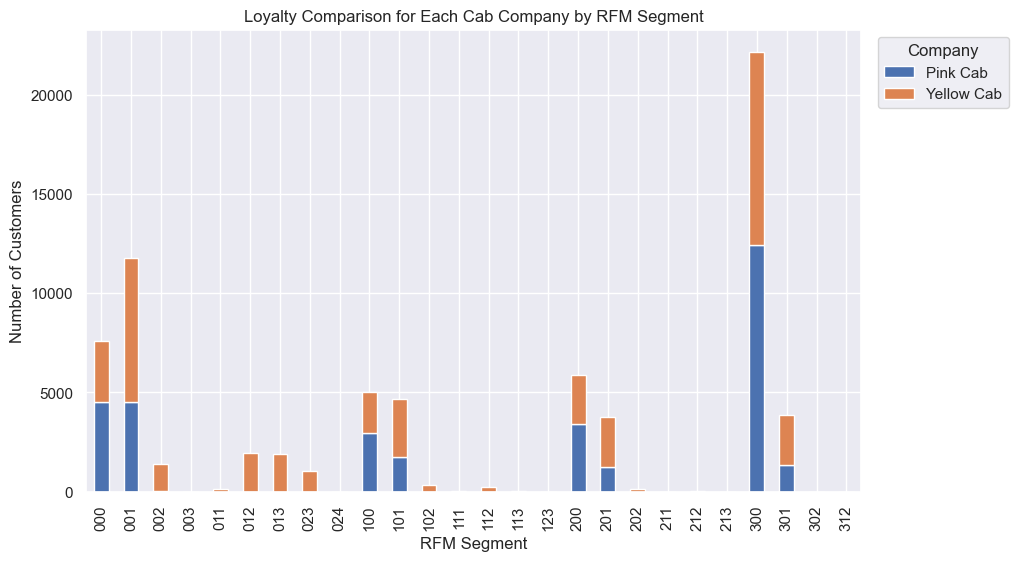

In [60]:
# Plot the loyalty comparison
loyalty_comparison.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Loyalty Comparison for Each Cab Company by RFM Segment')
plt.xlabel('RFM Segment')
plt.ylabel('Number of Customers')
plt.legend(title='Company', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

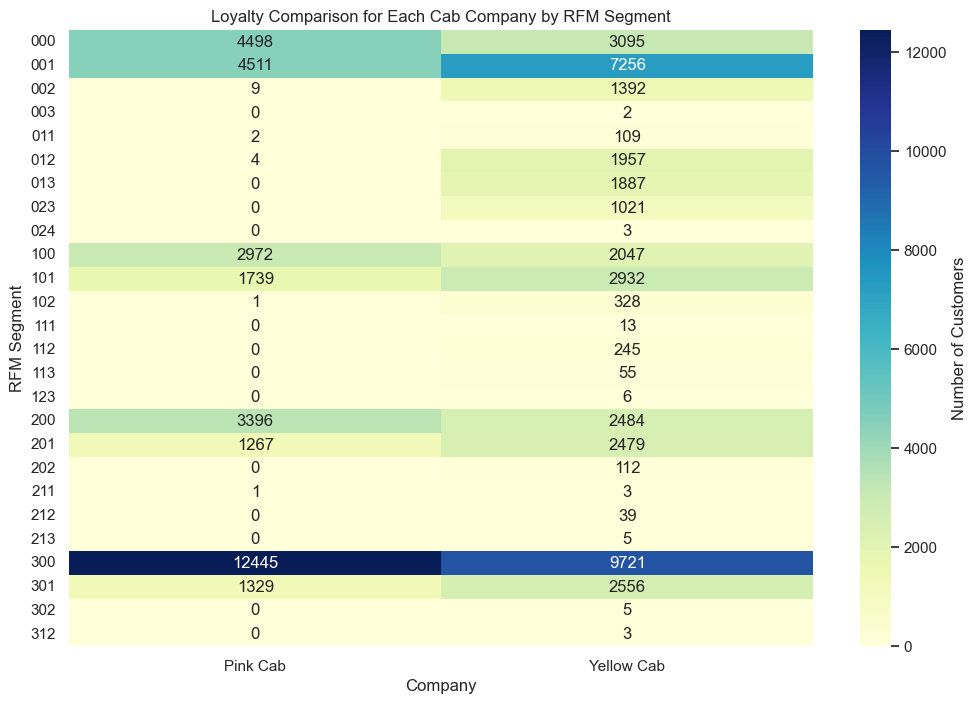

In [61]:
# Plot the loyalty comparison as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(loyalty_comparison, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Number of Customers'})
plt.title('Loyalty Comparison for Each Cab Company by RFM Segment')
plt.xlabel('Company')
plt.ylabel('RFM Segment')
plt.show()


In [62]:
rfm_data[rfm_data['RFM_Segment']=='000']

,Customer ID,Company,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Segment
12,7,Pink Cab,43,2,367.16,0,0,0,000
24,13,Pink Cab,20,4,525.09,0,0,0,000
55,29,Pink Cab,25,4,861.34,0,0,0,000
75,39,Pink Cab,75,2,712.38,0,0,0,000
107,55,Pink Cab,18,1,115.44,0,0,0,000
...,...,...,...,...,...,...,...,...,...
71889,59980,Pink Cab,28,2,220.02,0,0,0,000
71898,59985,Pink Cab,45,1,439.12,0,0,0,000
71904,59988,Pink Cab,45,3,933.82,0,0,0,000
71920,59996,Yellow Cab,80,4,805.43,0,0,0,000


### Conclusion

* What is the customer loyalty and retention rate for each company?
Both cab companies exhibit a predominant customer group within segment 300 (recency = 3, frequency = 0, and monetary value = 0), indicating an overall lower level of customer loyalty and retention across the board. This segment comprises customers who last used the cabs over a year ago, with limited trips (up to 15) and modest spending (up to 1000 US dollars), signalling a potential lack of recent engagement and reduced loyalty among the customer base for both companies.


* Are there specific customer segments that are more loyal to one cab company over the other?
Pink Cab primarily retains customers within segments 000, 001, 100, 101, 200, 201, 300, and 301. This suggests that Pink Cab's customer base tends to use cabs less frequently and spends comparatively less on trips, despite recent travel. In contrast, Yellow Cab accommodates customers across various segments, indicating a diverse customer base that includes individuals who spend more generously on trips, utilize cabs more frequently, or have recently utilized their services. This diversity suggests a potential for higher customer loyalty in specific segments for Yellow Cab compared to Pink Cab.


* Are there indications of potential churn among specific customer segments?
Segments 000 and 001 display a moderately high number of customers across both cab companies. These segments represent customers who have used the cabs fairly recently but have made few trips and spent less on these trips. This pattern may indicate a potential churn risk among customers falling into these segments, as they show recent activity but limited engagement and spending. Additionally, the presence of diverse segments using Yellow Cab some with high spending, frequent usage, or recent activity suggests a potential for retaining customers across different engagement levels, potentially minimising churn within specific customer segments.

## 5. Pricing Analysis:
How sensitive are customers to price changes in the cab industry?
 
Areas to Investigate:
- What is the average price charged by each company? How has it changed over time?
- What is the demand at a particular price

In [63]:
## Price analysis


new_df = master_df.copy()
new_df['Year'] = new_df['Date of Travel'].dt.year
new_df['Price Per KM'] = new_df["Price Charged"]/new_df['KM Travelled']


prices = new_df.groupby(['Year','Company']).agg({
    'Transaction ID': 'count',
    'Price Per KM' : 'mean',
    'KM Travelled'  : 'mean'
}).reset_index()

prices.columns = ['Year','Company','Number of Users','Average Price Charged','Average distance travelled']




prices

,Year,Company,Number of Users,Average Price Charged,Average distance travelled
0,2016,Pink Cab,24194,14.005700,22.462757
1,2016,Yellow Cab,78765,20.591436,22.616615
2,2017,Pink Cab,30321,13.961471,22.618763
3,2017,Yellow Cab,98189,20.697927,22.557303
4,2018,Pink Cab,29310,13.354016,22.577275
5,2018,Yellow Cab,94253,19.561922,22.541036


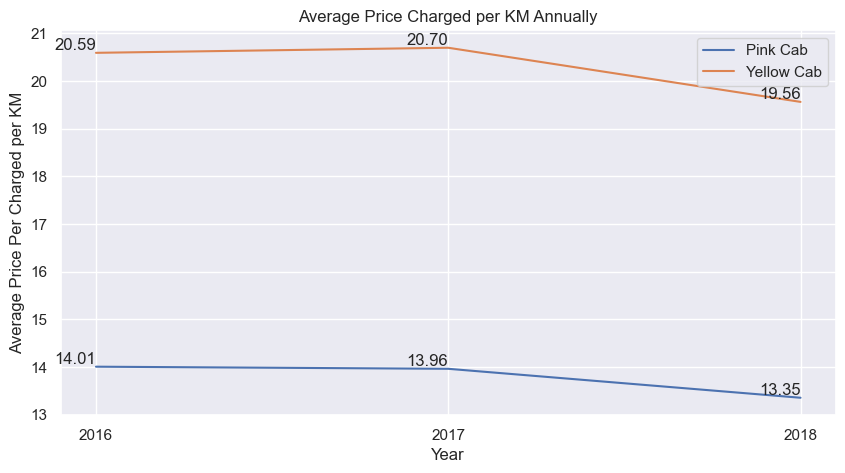

In [64]:

## Create pink cab dataframe
pink_prices = prices[prices['Company']=='Pink Cab'] 

## Create yellow cab dataframe
yellow_prices = prices[prices['Company']=='Yellow Cab']


plt.figure(figsize=(10, 5))
plt.plot(pink_prices['Year'], pink_prices['Average Price Charged'], label='Pink Cab')
plt.plot(yellow_prices['Year'], yellow_prices['Average Price Charged'], label='Yellow Cab')

# Annotating the points with value labels
for x, y in zip(pink_prices['Year'], pink_prices['Average Price Charged']):
    plt.text(x, y, f'{y:.2f}', ha='right', va='bottom')

for x, y in zip(yellow_prices['Year'], yellow_prices['Average Price Charged']):
    plt.text(x, y, f'{y:.2f}', ha='right', va='bottom')

plt.title('Average Price Charged per KM Annually')
plt.xlabel('Year')
plt.ylabel('Average Price Per Charged per KM')
plt.xticks([2016, 2017, 2018])  # Setting x-axis ticks explicitly to display only the years
plt.legend()
plt.grid(True)
plt.show()



* The average price charged as decreased over the three year period. 
* The Pink Cab charges customers the least amount of mean per km (under 15 US dollars) compared to Yellow Cab Company cab who charge an average of 20 US dollars per km.


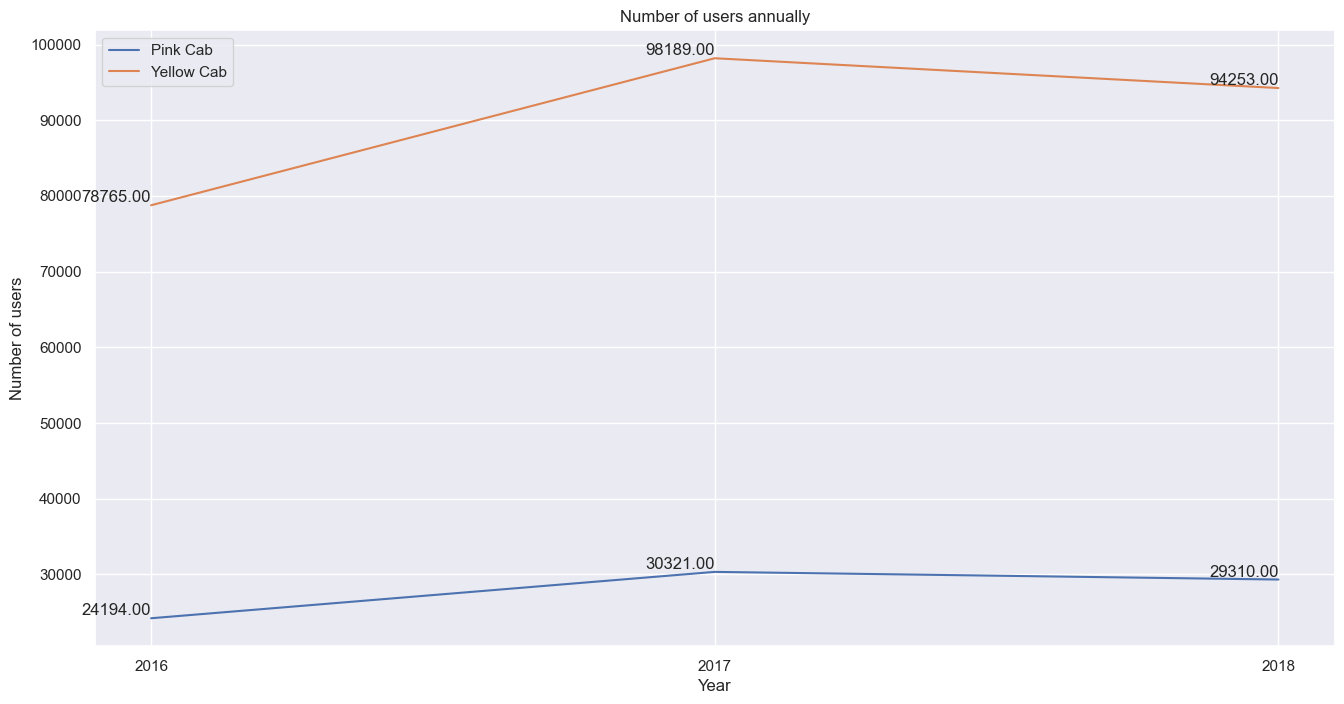

In [65]:
### Demand Analysis


plt.figure(figsize=(16,8))
plt.plot(pink_prices['Year'], pink_prices['Number of Users'], label='Pink Cab')
plt.plot(yellow_prices['Year'], yellow_prices['Number of Users'], label='Yellow Cab')

# Annotating the points with value labels
for x, y in zip(pink_prices['Year'], pink_prices['Number of Users']):
    plt.text(x, y, f'{y:.2f}', ha='right', va='bottom')

for x, y in zip(yellow_prices['Year'], yellow_prices['Number of Users']):
    plt.text(x, y, f'{y:.2f}', ha='right', va='bottom')

plt.title('Number of users annually')
plt.xlabel('Year')
plt.ylabel('Number of users')
plt.xticks([2016, 2017, 2018])  # Setting x-axis ticks explicitly to display only the years
plt.legend()
plt.grid(True)
plt.show()


* In 2017, Yellow Cab experienced a surge in customer numbers, prompting an increase in their prices to meet the heightened demand. However, this upward trend reversed in 2018, witnessing a decline in both the number of customers and the corresponding price charged.

* Contrastingly, the Pink Cab maintained a relatively low customer count throughout the three-year period. In 2017, the Pink Cab lowered its prices, resulting in a notable increase in the number of customers. Notably, 2017 witnessed an increase in cab customers across all companies. However, similar to Yellow Cab, Pink Cab also observed a decline in customer numbers in 2018.

* These trends strongly suggest a potential correlation between the average price charged and the number of customers for both cab companies.

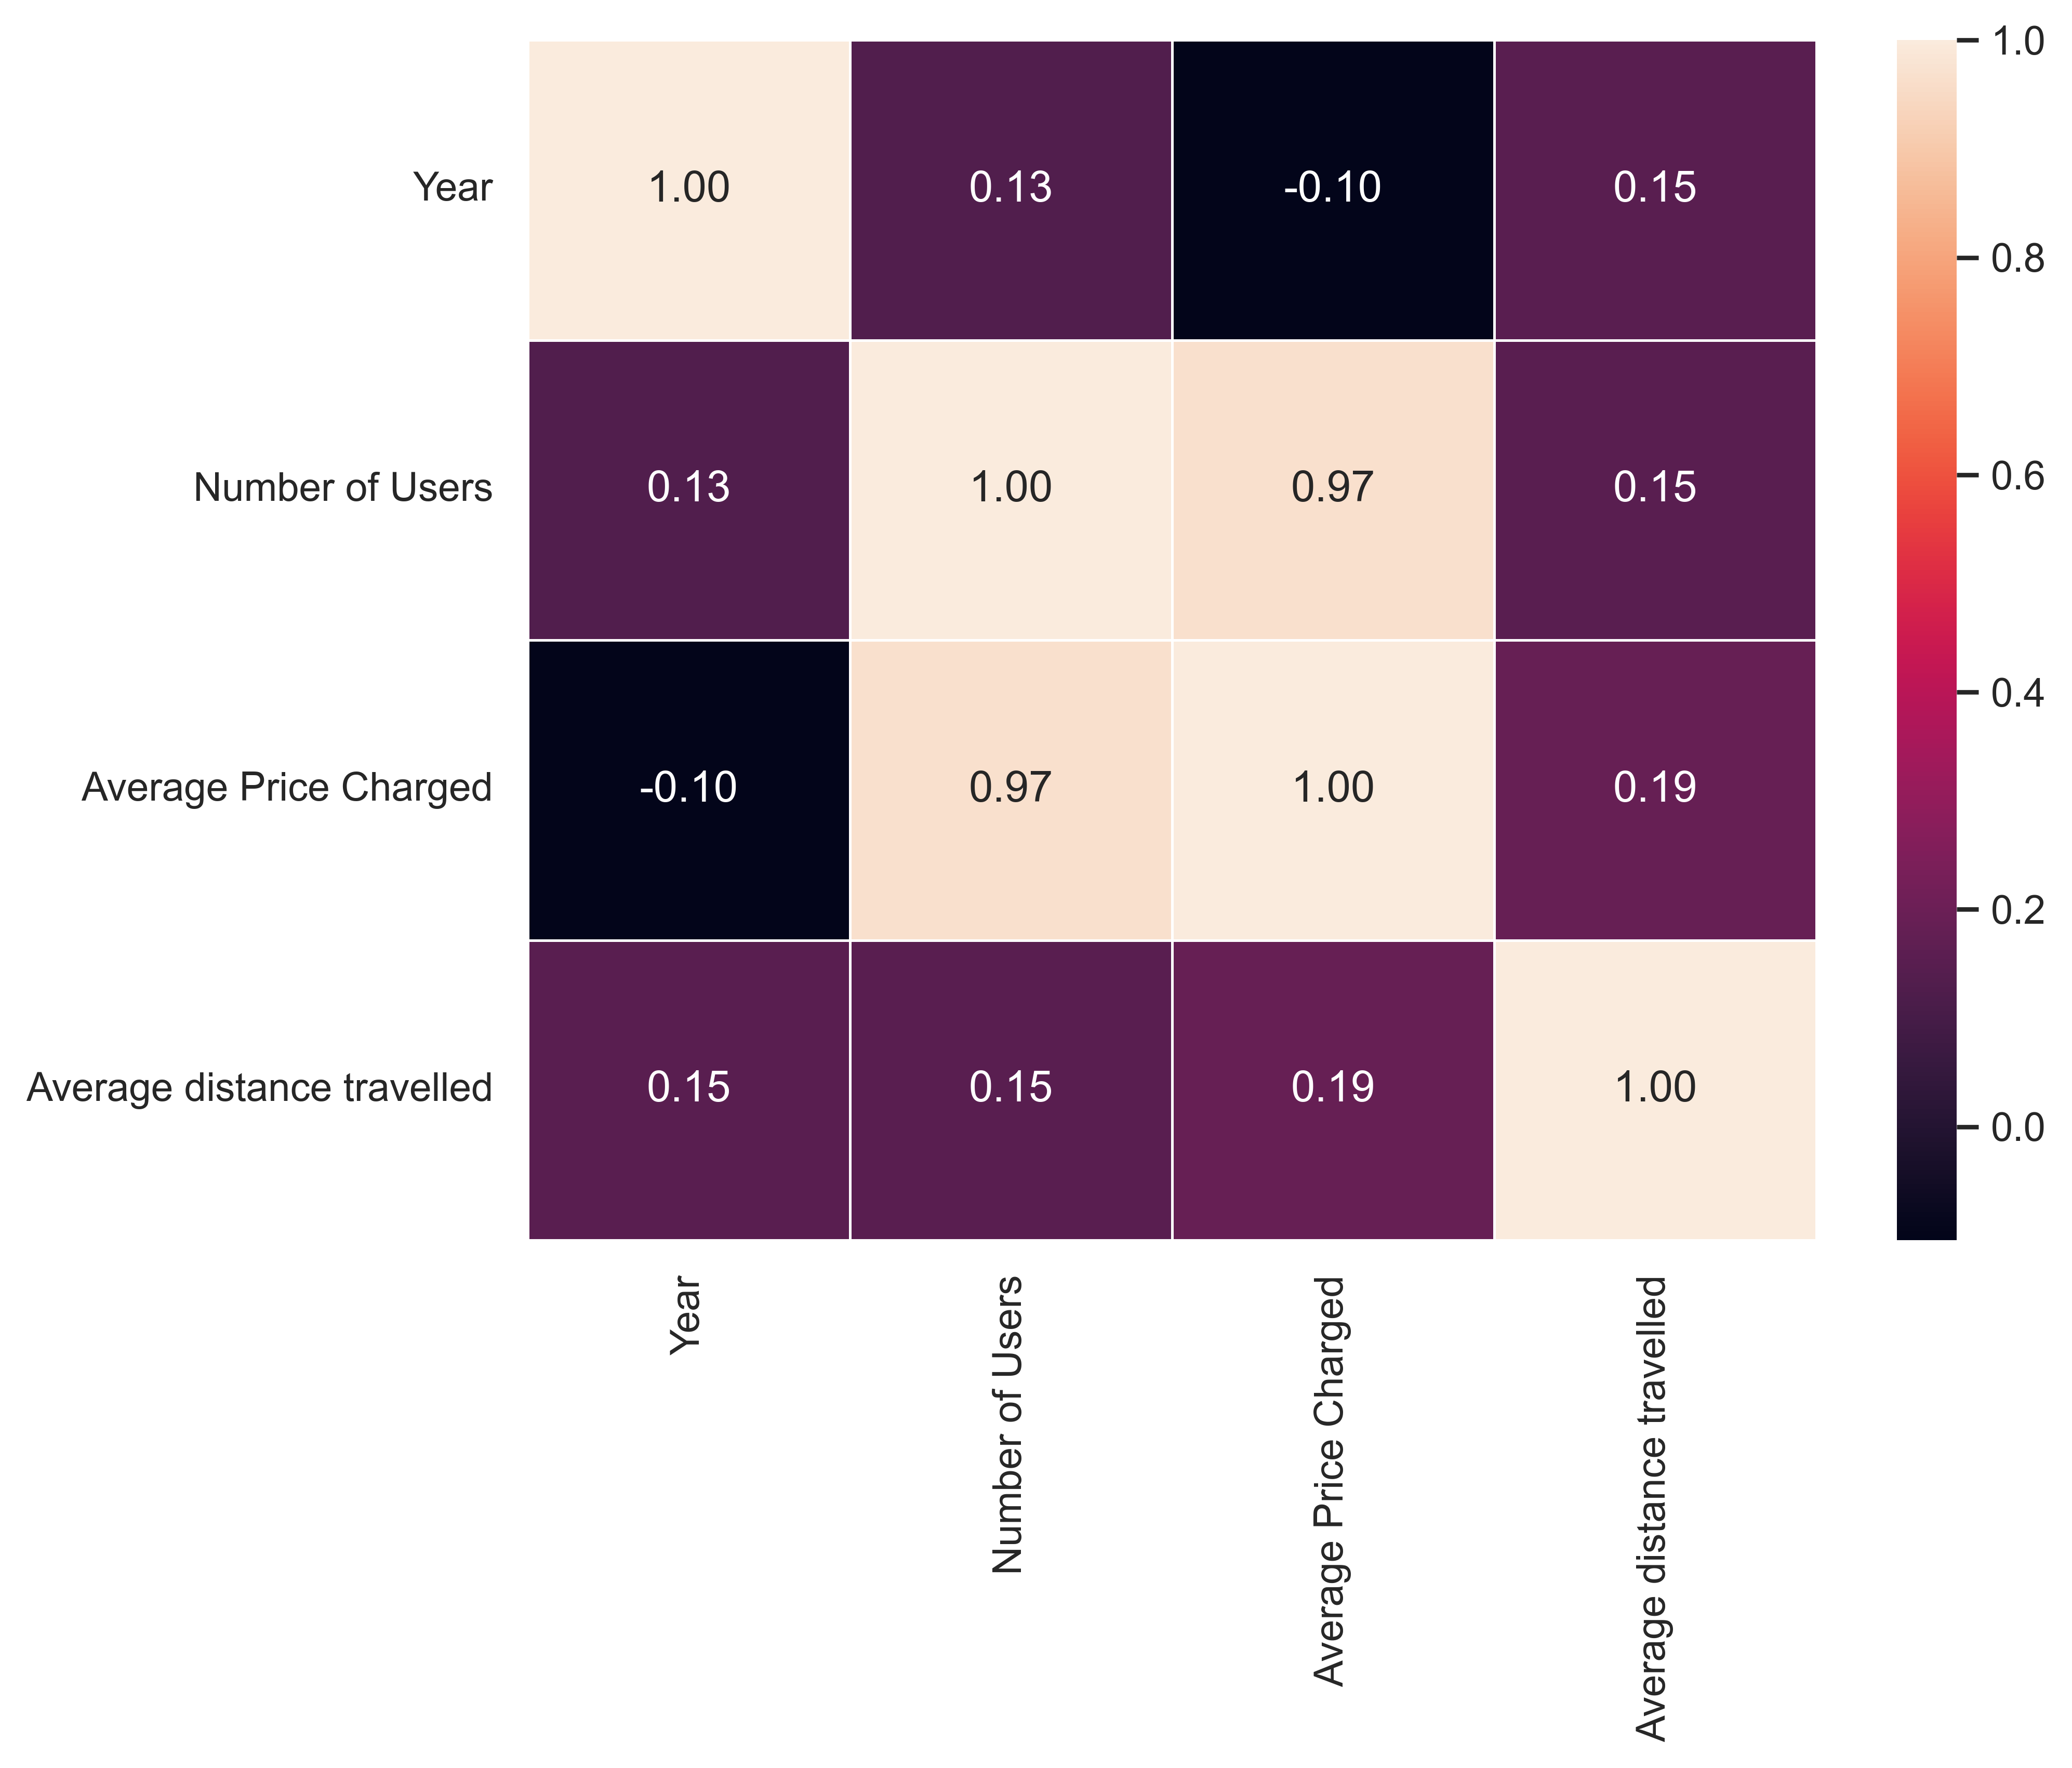

In [66]:
### correlation Analysis

correl = prices.corr(method = 'pearson')
plt.figure(figsize=(8, 6), dpi=500)
sns.heatmap(correl, annot=True, fmt=".2f", linewidth=.5)
plt.show()

* The correlation heatmap reveals a strong positive correlation between the number of customers and the average price charged per kilometre. This substantiates the influence of pricing on the demand for cabs, indicating that changes in the price significantly impact customer numbers. However, the correlations for the average price charged and the average distance travelled (0.19), as well as the average distance travelled and the number of customers (0.15), were notably low. These figures signify a weak relationship between these features, suggesting that changes in the average distance travelled have a limited impact on both the average price charged and the number of customers.


### Conclusion


#### Sensitivity of Customers to Price Changes:
The trends observed in 2017 indicate a significant sensitivity of customers to price changes within the cab industry. Both Yellow Cab and Pink Cab witnessed noticeable shifts in customer numbers, corresponding to alterations in their pricing strategies. Yellow Cab's surge in customer numbers after increasing prices and the subsequent decline in both customer count and price in 2018, alongside Pink Cab's lower pricing and subsequent customer increase in 2017 followed by a decline in 2018, signify a direct correlation between price changes and customer demand. These fluctuations imply a high sensitivity of customers to alterations in cab prices.

#### Average Price Charged by Each Company Over Time:
Yellow Cab experienced a surge in prices in 2017, accompanying a surge in customer numbers. However, this reversed in 2018, witnessing a decline in both customers and the corresponding price.
Pink Cab: Maintained lower pricing and customer counts overall. Low prices in 2017 led to increased customer numbers. Like Yellow Cab, we observed a decline in customers in 2018.

#### Demand at a Particular Price:
The correlation heatmap underscores a strong positive relationship between the number of customers and the average price charged per kilometre. This robust correlation signifies the substantial impact of pricing on cab demand. However, weaker correlations between the average price charged and the average distance travelled (0.19) and the average distance travelled and the number of customers (0.15) indicate a limited impact of distance travelled on both pricing and customer numbers.

## 6. Profit Analysis:

- How do different factors influence the profitability of cab companies? 
 
Areas to Investigate:
 - How do operational costs revenue trend change over time for each company?
 - Are there opportunities to optimize costs and enhance profitability?
 - Which customer segments contribute significantly to the profitability of cab companies?


### Revenue

In [67]:
new_data = master_df.copy()
new_data['Year'] = new_data['Date of Travel'].dt.year

### Create profit dataframe
Profit_data = new_data.groupby(['Year','Company']).agg({
    'Price Charged': 'sum',
    'Cost of Trip': 'sum',
    'Transaction ID': 'nunique',
    'KM Travelled': 'sum'
}).reset_index()

Profit_data.columns = ['Year','Company','Revenue','Costs','Number of Trips','Total KM Travelled']


### profit feature
Profit_data['Profit'] = Profit_data['Revenue'] - Profit_data['Costs']
Profit_data['Profit Margin'] = Profit_data['Profit']/Profit_data['Revenue']
Profit_data['Profit per trip']=Profit_data['Profit']/Profit_data['Number of Trips']
Profit_data['Profit per KM']=Profit_data['Profit']/Profit_data['Total KM Travelled']

In [68]:
## Create pink cab dataframe
pink_profit_df = Profit_data[Profit_data['Company']=='Pink Cab'] 

## Create yellow cab dataframe
yellow_profit_df = Profit_data[Profit_data['Company']=='Yellow Cab']

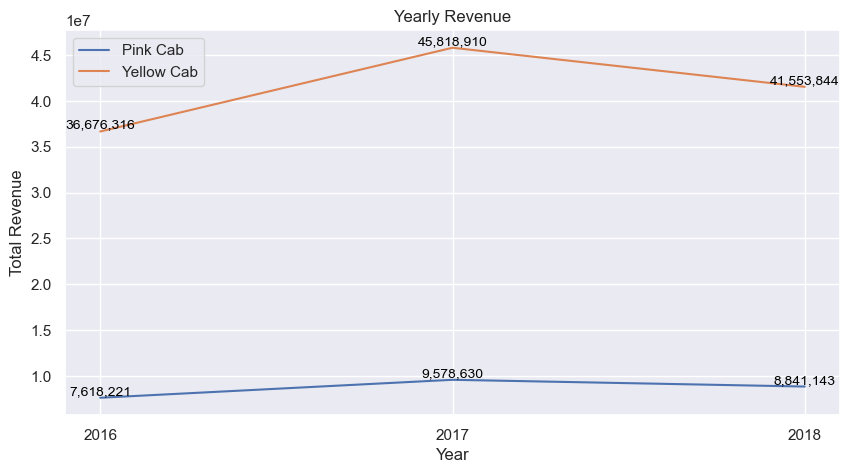

In [69]:
# Plotting the time series
plt.figure(figsize=(10, 5))
plt.plot(pink_profit_df['Year'], pink_profit_df['Revenue'], label='Pink Cab')
plt.plot(yellow_profit_df['Year'], yellow_profit_df['Revenue'], label='Yellow Cab')

# Adding data labels
for i, year in enumerate(pink_profit_df['Year']):
    plt.text(year, pink_profit_df['Revenue'].iloc[i], f'{pink_profit_df["Revenue"].iloc[i]:,.0f}', ha='center', va='bottom',color='black', fontsize=10)

for i, year in enumerate(yellow_profit_df['Year']):
    plt.text(year, yellow_profit_df['Revenue'].iloc[i], f'{yellow_profit_df["Revenue"].iloc[i]:,.0f}', ha='center', va='bottom',color='black', fontsize=10)

# Set x-axis ticks to integers
plt.xticks(pink_profit_df['Year'].unique())

plt.title('Yearly Revenue')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.legend()
plt.grid(True)
plt.show()


* The Yellow Cab Company generated the most revenue over the three year company, totalling a revenue over 30 million US dollars a year from 2016 to 2017.
* The Pink Cab company was able to achieve a revenue of between 7 million and 9.6 million US dollars over the three year period.

### Costs

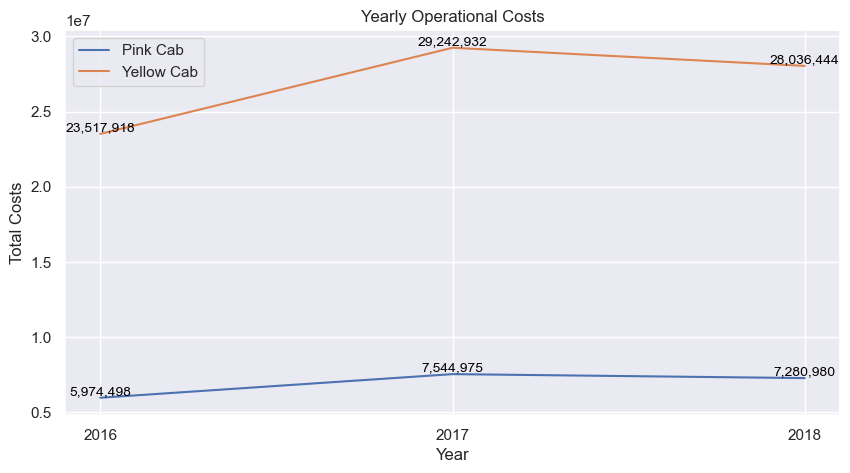

In [70]:
# Plotting the time series
plt.figure(figsize=(10, 5))
plt.plot(pink_profit_df['Year'], pink_profit_df['Costs'], label='Pink Cab')
plt.plot(yellow_profit_df['Year'], yellow_profit_df['Costs'], label='Yellow Cab')

# Adding data labels
for i, year in enumerate(pink_profit_df['Year']):
    plt.text(year, pink_profit_df['Costs'].iloc[i], f'{pink_profit_df["Costs"].iloc[i]:,.0f}', ha='center', va='bottom',color='black', fontsize=10)

for i, year in enumerate(yellow_profit_df['Year']):
    plt.text(year, yellow_profit_df['Costs'].iloc[i], f'{yellow_profit_df["Costs"].iloc[i]:,.0f}', ha='center', va='bottom',color='black', fontsize=10)

# Set x-axis ticks to integers
plt.xticks(pink_profit_df['Year'].unique())

plt.title('Yearly Operational Costs')
plt.xlabel('Year')
plt.ylabel('Total Costs')
plt.legend()
plt.grid(True)
plt.show()


* Both companies had fairly high operational costs over the three year period.

### Profit

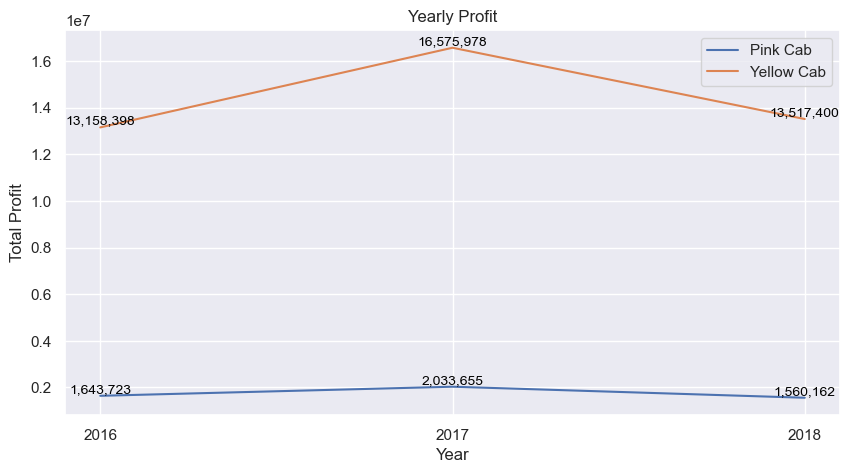

In [71]:
# Plotting the time series
plt.figure(figsize=(10, 5))
plt.plot(pink_profit_df['Year'], pink_profit_df['Profit'], label='Pink Cab')
plt.plot(yellow_profit_df['Year'], yellow_profit_df['Profit'], label='Yellow Cab')

# Adding data labels
for i, year in enumerate(pink_profit_df['Year']):
    plt.text(year, pink_profit_df['Profit'].iloc[i], f'{pink_profit_df["Profit"].iloc[i]:,.0f}', ha='center', va='bottom',color='black', fontsize=10)

for i, year in enumerate(yellow_profit_df['Year']):
    plt.text(year, yellow_profit_df['Profit'].iloc[i], f'{yellow_profit_df["Profit"].iloc[i]:,.0f}', ha='center', va='bottom',color='black', fontsize=10)

# Set x-axis ticks to integers
plt.xticks(pink_profit_df['Year'].unique())

plt.title('Yearly Profit')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.legend()
plt.grid(True)
plt.show()


* The Yellow Cab company made the most profit over the three-year period. They totaled over 13 million US dollars in profit.
* The Pink Cab company, on the other hand, made roughly between 1.5 million and 2 million US dollars annually.

### Profit Margin

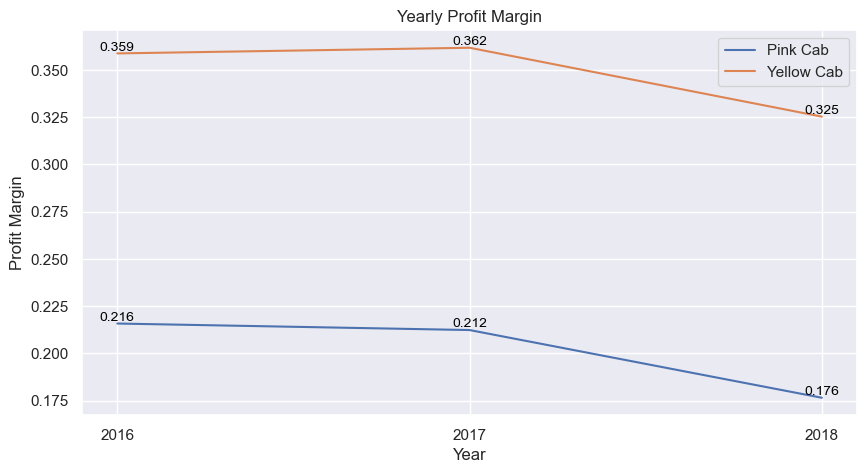

In [72]:
# Plotting the time series
plt.figure(figsize=(10, 5))
plt.plot(pink_profit_df['Year'], pink_profit_df['Profit Margin'], label='Pink Cab')
plt.plot(yellow_profit_df['Year'], yellow_profit_df['Profit Margin'], label='Yellow Cab')

# Adding data labels
for i, year in enumerate(pink_profit_df['Year']):
    plt.text(year, pink_profit_df['Profit Margin'].iloc[i], f'{pink_profit_df["Profit Margin"].iloc[i]:,.3f}', ha='center', va='bottom',color='black', fontsize=10)

for i, year in enumerate(yellow_profit_df['Year']):
    plt.text(year, yellow_profit_df['Profit Margin'].iloc[i], f'{yellow_profit_df["Profit Margin"].iloc[i]:,.3f}', ha='center', va='bottom',color='black', fontsize=10)

# Set x-axis ticks to integers
plt.xticks(pink_profit_df['Year'].unique())

plt.title('Yearly Profit Margin')
plt.xlabel('Year')
plt.ylabel('Profit Margin')
plt.legend()
plt.grid(True)
plt.show()

* The two companies achieved the highest profit margin in 2017, followed by in 2016, and the lowest in 2018.
* The Yellow Cab company had the highest profit margin overall. 

### Profit per trip and per KM 

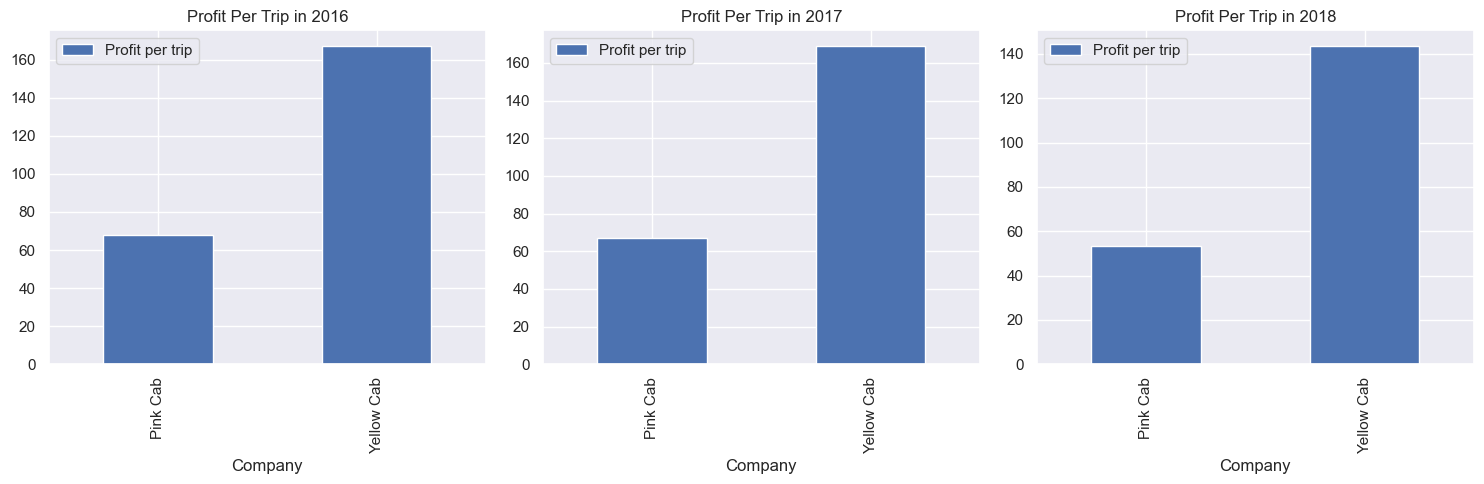

In [73]:
profit_2016 = Profit_data[Profit_data['Year']==2016]
profit_2017 = Profit_data[Profit_data['Year']==2017]
profit_2018 = Profit_data[Profit_data['Year']==2018]

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot for 2016
profit_2016[['Company','Profit per trip']].plot('Company', kind='bar', ax=axs[0])
axs[0].set_title('Profit Per Trip in 2016')

# Plot for 2017
profit_2017[['Company', 'Profit per trip']].plot('Company', kind='bar', ax=axs[1])
axs[1].set_title('Profit Per Trip in 2017')

# Plot for 2018
profit_2018[['Company', 'Profit per trip']].plot('Company', kind='bar', ax=axs[2])
axs[2].set_title('Profit Per Trip in 2018')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

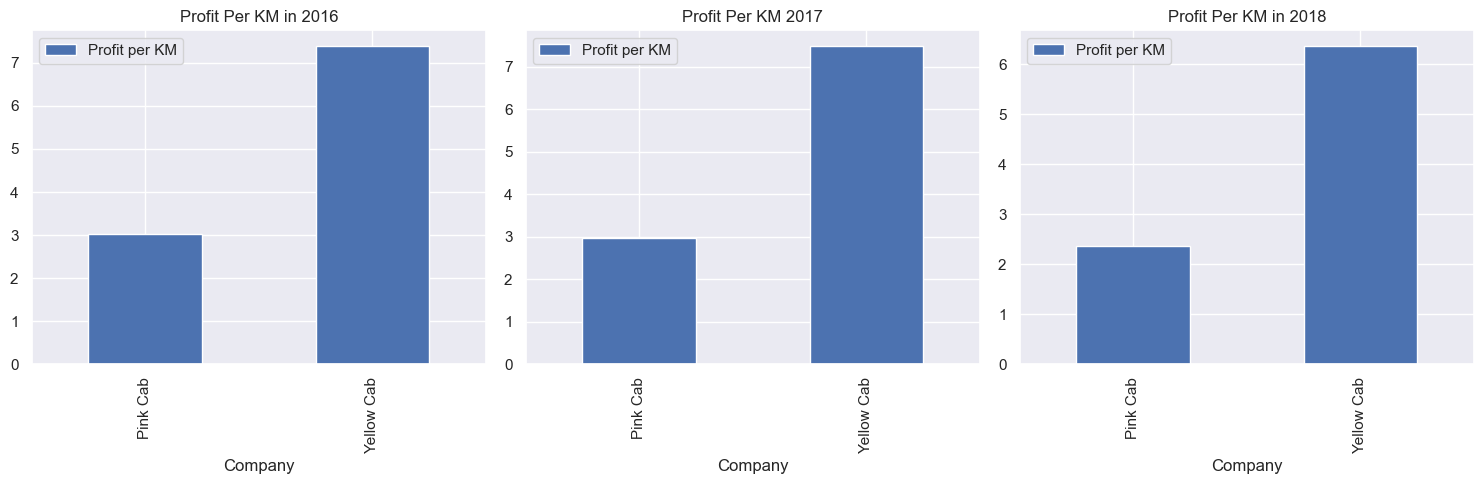

In [74]:
profit_2016 = Profit_data[Profit_data['Year']==2016]
profit_2017 = Profit_data[Profit_data['Year']==2017]
profit_2018 = Profit_data[Profit_data['Year']==2018]

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot for 2016
profit_2016[['Company','Profit per KM']].plot('Company', kind='bar', ax=axs[0])
axs[0].set_title('Profit Per KM in 2016')

# Plot for 2017
profit_2017[['Company', 'Profit per KM']].plot('Company', kind='bar', ax=axs[1])
axs[1].set_title('Profit Per KM 2017')

# Plot for 2018
profit_2018[['Company', 'Profit per KM']].plot('Company', kind='bar', ax=axs[2])
axs[2].set_title('Profit Per KM in 2018')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

* The Yellow Cab company had the highest overall profit per distance travelled comapred to the Pink Cab company.

In [75]:
### Customer segments and profitability

In [76]:
df = master_df.copy()
df['Year'] = df['Date of Travel'].dt.year

young_threshold = 29 
old_threshold = 49

# Categorize the ages
df['Age_bin'] = pd.cut(df['Age'], bins=[0, young_threshold, old_threshold, float('inf')],
labels=['18-29', '30-49', '50-65'])


low_threshold = 8000
high_threshold = 15000

df['Income_bin'] = pd.cut(df['Income (USD/Month)'], bins=[0, low_threshold, high_threshold, float('inf')],
labels=['Low Income', 'Medium Income', 'High Income'])


profit_segments  = df.groupby(['Year','Age_bin','Company']).agg({
    'Price Charged': 'sum',
    'Cost of Trip':'sum'
}).reset_index()

profit_segments.columns= ['Year','Age_bin','Company','Revenue','Costs']

profit_segments.head()

profit_segments['Profit']= profit_segments['Revenue']-profit_segments['Costs']
profit_segments.head()

,Year,Age_bin,Company,Revenue,Costs,Profit
0,2016,18-29,Pink Cab,2954486.19,2.313451e+06,6.410348e+05
1,2016,18-29,Yellow Cab,14106263.94,9.021100e+06,5.085164e+06
2,2016,30-49,Pink Cab,3330624.61,2.619497e+06,7.111277e+05
3,2016,30-49,Yellow Cab,16417924.04,1.051277e+07,5.905156e+06
4,2016,50-65,Pink Cab,1333109.87,1.041549e+06,2.915607e+05


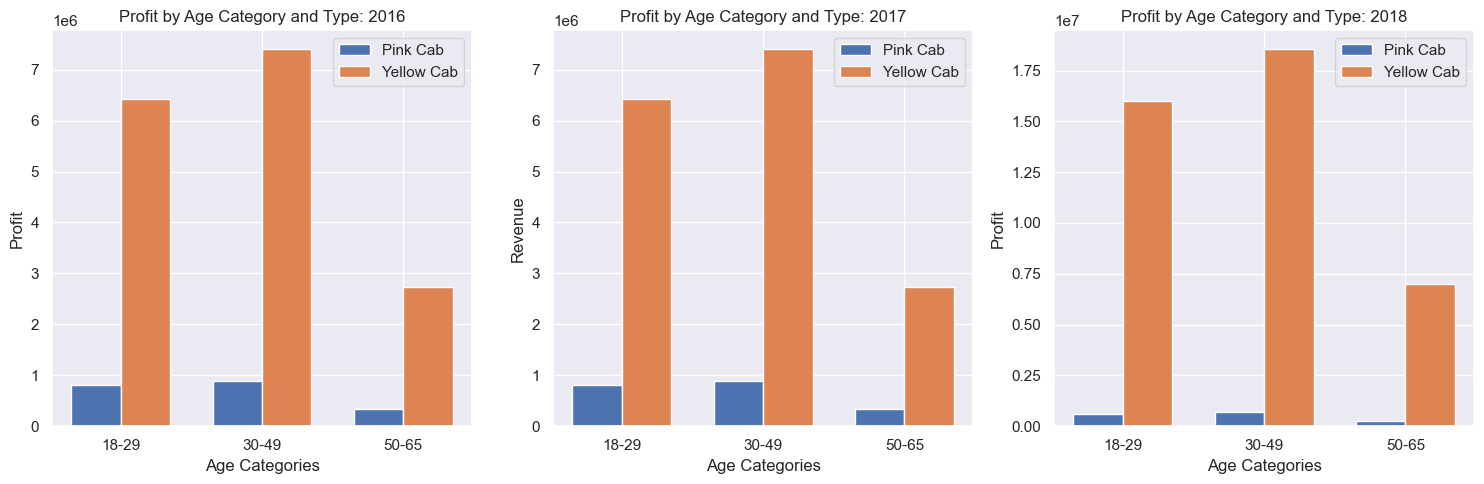

In [77]:
ageProf_2016 = profit_segments[profit_segments['Year']==2017]
ageProf_2017 = profit_segments[profit_segments['Year']==2017]
ageProf_2018 = profit_segments[profit_segments['Year']==2018]


pinkProf16 = ageProf_2016[ageProf_2016['Company'] == 'Pink Cab']
pinkProf17 = ageProf_2017[ageProf_2017['Company'] == 'Pink Cab']
pinkProf18 = ageProf_2018[ageProf_2018['Company'] == 'Pink Cab']

yellowProf16 = ageProf_2016[ageProf_2016['Company'] == 'Yellow Cab']
yellowProf17 = ageProf_2017[ageProf_2017['Company'] == 'Yellow Cab']
yellowProf18 = ageProf_2018[ageProf_2018['Company'] == 'Yellow Cab']


# Setting the positions for the bars
bar_width = 0.35
index = range(len(yellowProf16))

fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # Create subplots with 1 row and 3 columns

# Plot for 2016
axs[0].bar(index, pinkProf16['Profit'], bar_width, label='Pink Cab')
axs[0].bar([i + bar_width for i in index], yellowProf16['Profit'], bar_width, label='Yellow Cab')
axs[0].set_xlabel('Age Categories')
axs[0].set_ylabel('Profit')
axs[0].set_title('Profit by Age Category and Type: 2016')
axs[0].set_xticks([i + bar_width / 2 for i in index])
axs[0].set_xticklabels(age_categories)
axs[0].legend()

# Plot for 2017
axs[1].bar(index, pinkProf17['Profit'], bar_width, label='Pink Cab')
axs[1].bar([i + bar_width for i in index], yellowProf17['Profit'], bar_width, label='Yellow Cab')
axs[1].set_xlabel('Age Categories')
axs[1].set_ylabel('Revenue')
axs[1].set_title('Profit by Age Category and Type: 2017')
axs[1].set_xticks([i + bar_width / 2 for i in index])
axs[1].set_xticklabels(age_categories)
axs[1].legend()

# Plot for 2018
axs[2].bar(index, pinkProf18['Profit'], bar_width, label='Pink Cab')
axs[2].bar([i + bar_width for i in index], yellowProf18['Revenue'], bar_width, label='Yellow Cab')
axs[2].set_xlabel('Age Categories')
axs[2].set_ylabel('Profit')
axs[2].set_title('Profit by Age Category and Type: 2018')
axs[2].set_xticks([i + bar_width / 2 for i in index])
axs[2].set_xticklabels(age_categories)
axs[2].legend()

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

* The demographic group aged between 30 and 50 emerges as the primary contributors to the profitability of both cab companies. This segment not only constitutes a significant portion of the customer base but also plays a pivotal role in driving profits. Conversely, customers above the age of 50 contribute comparatively less to the overall profitability of these cab companies.

* Similarly, high-income customers emerge as substantial contributors to the profits of these cab companies. Their purchasing power and expenditure significantly influence the companies' financial success, underscoring the importance of this demographic in driving revenue and overall profitability.


### Conclusion


#### Factors Influencing Cab Companies' Profitability:


##### Operational Costs and Revenue Trends Over Time:
Yellow Cab Company generated substantial revenue exceeding 30 million USD annually over the three years. However, they also incurred high operational costs, resulting in a profit margin fluctuating over the years, with the highest margin achieved in 2017.
Pink Cab Company achieves revenue ranging between 7 and 9.6 million USD annually. Similar to Yellow Cab, they experienced high operational costs, resulting in varying profit margins, peaking in 2017.

##### Opportunities for cost optimisation and profit enhancement:
Both cab companies faced consistent high operational costs over the three-year period. To enhance profitability, exploring strategies to optimise operational expenses could be vital. Analysing cost structures and seeking avenues for cost efficiency might improve profit margins.

##### Customer Segments and Profitability:
Aged 30 to 50 Demographic: Emerges as a significant contributor to the profitability of both cab companies. This demographic not only constitutes a substantial portion of the customer base but also plays a pivotal role in driving profits. Conversely, customers above 50 contribute relatively less to overall profitability.
High-Income Customers: Significantly contribute to the profits of both cab companies. Their spending power influences the companies' financial success, highlighting their importance in driving revenue and overall profitability.

##### Profit Margin Analysis and Profitability per Distance:
- Both companies achieved their highest profit margins in 2017, followed by 2016, and the lowest in 2018.
- Yellow Cab Company demonstrated the highest profit margin overall and higher profitability per distance traveled compared to Pink Cab Company.

By focusing on optimising operational costs and targeting key demographic segments such as the 30- to 50-year-old age group and high-income customers, cab companies can potentially improve profitability and sustain growth.

## EDA Insights and Recommendations


### Insights:

#### Market Dominance:
- **Larger Market Share:** Yellow Cab exhibits a larger market share compared to Pink Cab, indicating a more established presence in the industry.
- **Consistent Revenue Generation:** Demonstrates consistent high revenue generation, reflecting a robust customer base and market traction.

#### Profitability Analysis:
- **Revenue vs. Operational Costs:** While revenue remains high, there's a need for optimization due to persistent high operational costs impacting profitability.
- **Profit Margin Volatility:** Witnessed fluctuating profit margins over the years, indicating sensitivity to market shifts and operational efficiencies.

#### Customer Segment Analysis:
- **Demographic Impact:** Like Pink Cab, customers aged 30-50 and high-income individuals are vital contributors to profitability, emphasizing the importance of targeting this segment.


### Recommendations:

#### Operational Efficiency:
- **Cost Optimization:** Prioritize cost optimization strategies to enhance profitability by streamlining operational expenses and improving cost-efficiency measures.


#### Market Strategy:
- **Market Expansion:** Leverage the established market presence to expand into new territories or diversify service offerings to capture additional market segments.
- **Targeted Marketing:** Develop targeted marketing campaigns aimed at the lucrative demographic segments identified, emphasizing convenience and quality service.

#### Risk Management:
- **Risk Mitigation:** Develop risk mitigation strategies to address market volatility, regulatory changes, and competition, safeguarding against potential challenges.


Investing in Yellow Cab offers a robust market presence and revenue potential. However, leveraging this opportunity entails focusing on operational efficiency, strategic expansion, and customer-centric strategies to optimize profitability and ensure sustained growth in a competitive market landscape.